# Football Player Stats Analysis

## Machine LEarning


### EDA

In [ ]:
import numpy as np
import pandas as pd
import joblib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
light_path='/content/players_data_light-2024_2025.csv'

In [ ]:
df=pd.read_csv(light_path)
pd.set_option('display.max_columns', None)
df.tail()

Rk            Player  Nation Pos     Squad                Comp   Age  \
2849  2850      Edhy Zuliani  fr FRA  DF  Toulouse          fr Ligue 1  19.0   
2850  2851  Szymon Żurkowski  pl POL  MF    Empoli          it Serie A  26.0   
2851  2852   Martin Ødegaard  no NOR  MF   Arsenal  eng Premier League  25.0   
2852  2853       Milan Đurić  ba BIH  FW     Monza          it Serie A  34.0   
2853  2854       Milan Đurić  ba BIH  FW     Parma          it Serie A  34.0   

        Born  MP  Starts   Min   90s  Gls  Ast  G+A  G-PK  PK  PKatt  CrdY  \
2849  2004.0   1       0     9   0.1    0    0    0     0   0      0     0   
2850  1997.0   5       0   106   1.2    0    0    0     0   0      0     0   
2851  1998.0  30      26  2325  25.8    3    8   11     2   1      1     4   
2852  1990.0  18      13  1270  14.1    4    1    5     4   0      0     3   
2853  1990.0   9       3   268   3.0    1    0    1     1   0      0     1   

      CrdR   xG  npxG  xAG  npxG+xAG  G+A-PK  xG+xAG  PrgC  PrgP  PrgR  Sh  \
2849     0  0.0   0.0  0.0       0.0    0.00    0.00     0     0     0   0   
2850     0  0.1   0.1  0.0       0.1    0.00    0.07     1     1     3   2   
2851     0  4.8   4.0  5.4       9.5    0.39    0.40    92   258   154  48   
2852     0  2.9   2.9  1.1       4.0    0.35    0.28     2    21    30  23   
2853     0  0.3   0.3  0.0       0.3    0.34    0.08     0     7     6   5   

      SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT  Dist  FK  PK_stats_shooting  \
2849    0   NaN   0.00    0.00   NaN    NaN   NaN   0                  0   
2850    0   0.0   1.70    0.00  0.00    NaN  17.0   0                  0   
2851   15  31.3   1.86    0.58  0.04   0.13  19.2   3                  1   
2852   10  43.5   1.63    0.71  0.17   0.40  11.7   0                  0   
2853    1  20.0   1.68    0.34  0.20   1.00  12.8   0                  0   

      PKatt_stats_shooting  xG_stats_shooting  npxG_stats_shooting  npxG/Sh  \
2849                     0                0.0                  0.0      NaN   
2850                     0                0.1                  0.1     0.04   
2851                     1                4.8                  4.0     0.08   
2852                     0                2.9                  2.9     0.13   
2853                     0                0.3                  0.3     0.05   

      G-xG  np:G-xG   Cmp   Att   Cmp%  TotDist  PrgDist  Ast_stats_passing  \
2849   0.0      0.0     2     2  100.0       22        0                  0   
2850  -0.1     -0.1    27    33   81.8      338      109                  0   
2851  -1.8     -2.0  1237  1499   82.5    19237     5460                  8   
2852   1.1      1.1   131   266   49.2     1564      442                  1   
2853   0.7      0.7    35    84   41.7      390      154                  0   

      xAG_stats_passing   xA  A-xAG  KP  1/3  PPA  CrsPA  PrgP_stats_passing  \
2849                0.0  0.0    0.0   0    0    0      0                   0   
2850                0.0  0.0    0.0   0    0    1      0                   1   
2851                5.4  6.7    2.6  63  132   86      5                 258   
2852                1.1  0.2   -0.1   5   16    2      0                  21   
2853                0.0  0.1    0.0   0    3    3      0                   7   

      Live  Dead  FK_stats_passing_types  TB  Sw  Crs  TI  CK  In  Out  Str  \
2849     2     0                       0   0   0    0   0   0   0    0    0   
2850    33     0                       0   0   0    0   0   0   0    0    0   
2851  1373   114                      35  25   3   86  12  37  31    0    0   
2852   261     5                       0   0   2    0   0   0   0    0    0   
2853    82     2                       0   0   0    0   0   0   0    0    0   

      Cmp_stats_passing_types  Tkl  TklW  Def 3rd  Mid 3rd  Att 3rd  \
2849                        2    0     0        0        0        0   
2850                       27    6     4        2        4        0   
2851         

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Columns: 165 entries, Rk to AvgDist
dtypes: float64(61), int64(99), object(5)
memory usage: 3.6+ MB


In [ ]:
df.describe()

Rk          Age         Born           MP       Starts  \
count  2854.000000  2846.000000  2846.000000  2854.000000  2854.000000   
mean   1427.500000    25.018974  1998.637034    19.012964    13.497547   
std     824.023159     4.491624     4.497922    11.502122    11.322991   
min       1.000000    15.000000  1982.000000     1.000000     0.000000   
25%     714.250000    22.000000  1996.000000     9.000000     3.000000   
50%    1427.500000    25.000000  1999.000000    20.000000    11.000000   
75%    2140.750000    28.000000  2002.000000    30.000000    23.000000   
max    2854.000000    41.000000  2008.000000    38.000000    38.000000   

               Min          90s          Gls          Ast          G+A  \
count  2854.000000  2854.000000  2854.000000  2854.000000  2854.000000   
mean   1211.529082    13.460792     1.682901     1.200771     2.883672   
std     965.191628    10.724564     3.152732     1.946170     4.530513   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     317.250000     3.500000     0.000000     0.000000     0.000000   
50%    1052.500000    11.700000     0.000000     0.000000     1.000000   
75%    1996.750000    22.200000     2.000000     2.000000     4.000000   
max    3420.000000    38.000000    31.000000    18.000000    47.000000   

              G-PK           PK        PKatt         CrdY         CrdR  \
count  2854.000000  2854.000000  2854.000000  2854.000000  2854.000000   
mean      1.540645     0.142256     0.180098     2.499299     0.114926   
std       2.786905     0.667256     0.776321     2.607889     0.350406   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     2.000000     0.000000   
75%       2.000000     0.000000     0.000000     4.000000     0.000000   
max      24.000000     9.000000     9.000000    15.000000     3.000000   

                xG         npxG          xAG     npxG+xAG       G+A-PK  \
count  2854.000000  2854.000000  2854.000000  2854.000000  2854.000000   
mean      1.706903     1.564226     1.215662     2.781500     0.181345   
std       2.817612     2.458896     1.686875     3.744865     0.254105   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.100000     0.100000     0.100000     0.200000     0.000000   
50%       0.700000     0.700000     0.600000     1.400000     0.080000   
75%       2.100000     2.000000     1.600000     3.800000     0.280000   
max      27.100000    24.000000    14.200000    32.400000     2.650000   

            xG+xAG         PrgC         PrgP         PrgR           Sh  \
count  2854.000000  2854.000000  2854.000000  2854.000000  2854.000000   
mean      0.224919    20.733006    45.221093    44.796776    15.121584   
std       0.274015    26.635816    50.147121    59.818947    19.024021   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.042500     2.000000     5.000000     3.000000     2.000000   
50%       0.140000    11.000000    28.500000    20.000000     8.000000   
75%       0.330000    29.000000    69.000000    66.000000    21.000000   
max       5.060000   213.000000   362.000000   488.000000   152.000000   

               SoT         SoT%        Sh/90       SoT/90         G/Sh  \
count  2854.000000  2335.000000  2854.000000  2854.000000  2335.000000   
mean      5.050105    29.907323     1.289905     0.428062     0.080111   
std       7.406618    20.101257     2.349141     1.839121     0.101686   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    18.200000     0.300000     0.000000     0.000000   
50%       2.000000    30.800000     0.845000     0.190000     0.060000   
75%       7.000000    40.000000     1.870000     0.580000     0.130000   
max      75.000000   100.000000    90.000000    90.000000     1.000000   

             G

In [ ]:
list(df.columns)

['Rk',
 'Player',
 'Nation',
 'Pos',
 'Squad',
 'Comp',
 'Age',
 'Born',
 'MP',
 'Starts',
 'Min',
 '90s',
 'Gls',
 'Ast',
 'G+A',
 'G-PK',
 'PK',
 'PKatt',
 'CrdY',
 'CrdR',
 'xG',
 'npxG',
 'xAG',
 'npxG+xAG',
 'G+A-PK',
 'xG+xAG',
 'PrgC',
 'PrgP',
 'PrgR',
 'Sh',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'Dist',
 'FK',
 'PK_stats_shooting',
 'PKatt_stats_shooting',
 'xG_stats_shooting',
 'npxG_stats_shooting',
 'npxG/Sh',
 'G-xG',
 'np:G-xG',
 'Cmp',
 'Att',
 'Cmp%',
 'TotDist',
 'PrgDist',
 'Ast_stats_passing',
 'xAG_stats_passing',
 'xA',
 'A-xAG',
 'KP',
 '1/3',
 'PPA',
 'CrsPA',
 'PrgP_stats_passing',
 'Live',
 'Dead',
 'FK_stats_passing_types',
 'TB',
 'Sw',
 'Crs',
 'TI',
 'CK',
 'In',
 'Out',
 'Str',
 'Cmp_stats_passing_types',
 'Tkl',
 'TklW',
 'Def 3rd',
 'Mid 3rd',
 'Att 3rd',
 'Att_stats_defense',
 'Tkl%',
 'Lost',
 'Blocks_stats_defense',
 'Sh_stats_defense',
 'Pass',
 'Int',
 'Tkl+Int',
 'Clr',
 'Err',
 'SCA',
 'SCA90',
 'PassLive',
 'PassDead',
 'TO',


In [ ]:
df.count()

Rk         2854
Player     2854
Nation     2847
Pos        2854
Squad      2854
           ... 
Stp         212
Stp%        211
#OPA        212
#OPA/90     212
AvgDist     208
Length: 165, dtype: int64

In [ ]:
df['Pos'].value_counts()

Pos
DF       859
MF       589
FW       371
FW,MF    325
MF,FW    230
GK       212
DF,MF    110
MF,DF     81
DF,FW     53
FW,DF     24
Name: count, dtype: int64

In [ ]:

goalkeepers_df=df[df['Pos']=='GK']



### Goalkeepers

In [ ]:

goalkeeper_stats = ['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age','GA','GA90','SoTA','Saves','Stp','Stp%','CS','PKA','PKsv','PKm','PSxG','PSxG/SoT','PSxG+/-',
                    '/90','Att (GK)','Thr','Launch%','AvgLen','Recov','Opp','AvgDist','#OPA']
goalkeepers_df = goalkeepers_df[goalkeeper_stats]
goalkeepers_df.head()

Player  Nation Pos          Squad                Comp   Age  \
33               Adrián  es ESP  GK          Betis          es La Liga  37.0   
42   Julen Agirrezabala  es ESP  GK  Athletic Club          es La Liga  23.0   
82   Ben Alexander Voll  de GER  GK      St. Pauli       de Bundesliga  23.0   
87              Alisson  br BRA  GK      Liverpool  eng Premier League  31.0   
147     Alphonse Areola  fr FRA  GK       West Ham  eng Premier League  31.0   

       GA  GA90   SoTA  Saves   Stp  Stp%   CS  PKA  PKsv  PKm  PSxG  \
33   27.0  1.42   76.0   49.0  14.0   5.4  3.0  1.0   0.0  0.0  26.0   
42    9.0  0.67   34.0   24.0  20.0  14.0  5.0  1.0   1.0  0.0  10.5   
82    2.0  1.98    5.0    3.0   0.0   0.0  0.0  0.0   0.0  0.0   2.4   
87   29.0  1.04  100.0   73.0  11.0   4.3  9.0  1.0   0.0  0.0  30.5   
147  41.0  1.63  115.0   77.0  15.0   3.8  5.0  0.0   0.0  0.0  35.4   

     PSxG/SoT  PSxG+/-   /90  Att (GK)    Thr  Launch%  AvgLen  Recov    Opp  \
33       0.33     -1.0 -0.05     507.0   91.0     28.0    31.2     20  257.0   
42       0.27      1.5  0.11     341.0   51.0     37.5    33.9     21  143.0   
82       0.48      0.4  0.41      37.0    5.0     59.5    44.7      0   15.0   
87       0.30      3.5  0.13     877.0  128.0     19.7    26.6     47  255.0   
147      0.31     -2.6 -0.10     788.0  119.0     34.4    32.1     29  394.0   

     AvgDist  #OPA  
33      11.7  16.0  
42      14.2  17.0  
82       NaN   0.0  
87      16.0  49.0  
147     15.0  30.0

In [ ]:
goalkeepers_df.duplicated().sum()

np.int64(0)

In [ ]:
goalkeepers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 33 to 2840
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    212 non-null    object 
 1   Nation    212 non-null    object 
 2   Pos       212 non-null    object 
 3   Squad     212 non-null    object 
 4   Comp      212 non-null    object 
 5   Age       212 non-null    float64
 6   GA        212 non-null    float64
 7   GA90      212 non-null    float64
 8   SoTA      212 non-null    float64
 9   Saves     212 non-null    float64
 10  Stp       212 non-null    float64
 11  Stp%      211 non-null    float64
 12  CS        212 non-null    float64
 13  PKA       212 non-null    float64
 14  PKsv      212 non-null    float64
 15  PKm       212 non-null    float64
 16  PSxG      212 non-null    float64
 17  PSxG/SoT  206 non-null    float64
 18  PSxG+/-   212 non-null    float64
 19  /90       212 non-null    float64
 20  Att (GK)  212 non-null    float64
 

In [ ]:
goalkeepers_df.describe()

Age          GA        GA90        SoTA       Saves         Stp  \
count  212.000000  212.000000  212.000000  212.000000  212.000000  212.000000   
mean    27.900943   23.339623    1.479670   70.334906   47.240566   14.377358   
std      4.675701   19.032468    0.721054   57.823281   39.833464   13.874832   
min     18.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     24.000000    6.000000    1.080000   17.000000   11.000000    2.000000   
50%     27.500000   18.500000    1.410000   54.000000   36.500000   10.500000   
75%     31.000000   39.000000    1.845000  125.250000   83.000000   22.000000   
max     41.000000   77.000000    4.580000  209.000000  150.000000   64.000000   

             Stp%          CS         PKA        PKsv         PKm        PSxG  \
count  211.000000  212.000000  212.000000  212.000000  212.000000  212.000000   
mean     6.159716    4.165094    1.915094    0.443396    0.066038   22.812264   
std      4.074863    4.124382    2.142408    0.815492    0.248936   18.688315   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      4.000000    1.000000    0.000000    0.000000    0.000000    6.125000   
50%      5.600000    3.000000    1.000000    0.000000    0.000000   17.350000   
75%      7.900000    7.250000    3.000000    1.000000    0.000000   38.775000   
max     33.300000   16.000000   13.000000    4.000000    1.000000   73.500000   

         PSxG/SoT     PSxG+/-         /90     Att (GK)        Thr     Launch%  \
count  206.000000  212.000000  212.000000   212.000000  212.00000  212.000000   
mean     0.305728    0.161321   -0.030236   491.603774   69.45283   34.138208   
std      0.069291    3.598685    0.412294   410.272587   57.99046   14.239612   
min      0.030000  -12.200000   -2.720000     1.000000    0.00000    0.000000   
25%      0.270000   -1.525000   -0.142500   112.250000   15.75000   25.450000   
50%      0.300000    0.100000    0.005000   397.500000   55.00000   33.200000   
75%      0.337500    1.500000    0.130000   847.250000  120.25000   41.025000   
max      0.590000   14.600000    1.170000  1498.000000  197.00000   92.300000   

           AvgLen       Recov         Opp     AvgDist        #OPA  
count  212.000000  212.000000  212.000000  208.000000  212.000000  
mean    33.037264   22.301887  226.561321   13.908654   18.768868  
std      6.066525   19.805533  187.816491    3.734229   18.276921  
min      6.000000    0.000000    0.000000    2.000000    0.000000  
25%     29.475000    4.000000   55.750000   11.975000    3.000000  
50%     32.450000   17.000000  175.500000   13.700000   14.000000  
75%     35.900000   37.000000  408.000000   15.525000   30.250000  
max     56.300000   75.000000  710.000000   28.000000   89.000000

In [ ]:
goalkeepers_df.isna().sum()

Player      0
Nation      0
Pos         0
Squad       0
Comp        0
Age         0
GA          0
GA90        0
SoTA        0
Saves       0
Stp         0
Stp%        1
CS          0
PKA         0
PKsv        0
PKm         0
PSxG        0
PSxG/SoT    6
PSxG+/-     0
/90         0
Att (GK)    0
Thr         0
Launch%     0
AvgLen      0
Recov       0
Opp         0
AvgDist     4
#OPA        0
dtype: int64

In [ ]:
goalkeepers_df.dropna(inplace=True)
goalkeepers_df.to_csv('goalkeepers.csv',index=False)

In [ ]:
copy_goalkeepers_df=goalkeepers_df.copy()
goalkeepers_df.isna().sum()

Player      0
Nation      0
Pos         0
Squad       0
Comp        0
Age         0
GA          0
GA90        0
SoTA        0
Saves       0
Stp         0
Stp%        0
CS          0
PKA         0
PKsv        0
PKm         0
PSxG        0
PSxG/SoT    0
PSxG+/-     0
/90         0
Att (GK)    0
Thr         0
Launch%     0
AvgLen      0
Recov       0
Opp         0
AvgDist     0
#OPA        0
dtype: int64

#### Clustering

##### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()
standard_scaler.fit(goalkeepers_df.drop(['Player','Nation','Pos','Squad','Comp','Age'],axis=1))
scaled_X_goalkeeper=standard_scaler.transform(goalkeepers_df.drop(['Player','Nation','Pos','Squad','Comp','Age'],axis=1))

In [ ]:
scaled_X_goalkeeper

array([[ 0.15269604, -0.14693494,  0.05749416, ...,  0.12297012,
        -0.58961708, -0.18634933],
       [-0.80392263, -1.2430653 , -0.67696387, ..., -0.49017513,
         0.10793314, -0.13146195],
       [ 0.25898701, -0.70230766,  0.47718446, ...,  0.11221319,
         0.61016929,  1.62493402],
       ...,
       [ 0.89673278, -0.35154594,  1.2116425 , ...,  1.55902084,
         0.05212912,  2.11892039],
       [ 1.74706049,  0.23305692,  1.45646184, ...,  1.23631281,
        -0.08738092,  0.80162341],
       [-1.175941  ,  0.70073921, -1.20157676, ..., -1.15172658,
         0.83338535, -0.95477257]])

##### Elbow method

In [ ]:
import sklearn
from sklearn.cluster import KMeans

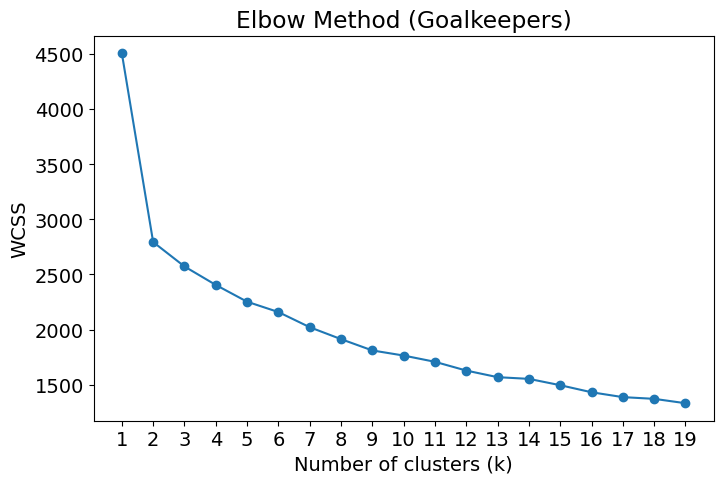

In [ ]:
WCSS = []
K = range(1, 20)

for i in K:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_X_goalkeeper)
    WCSS.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, WCSS, marker='o')
plt.xticks(K)
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method (Goalkeepers)")
plt.show()


##### Model training

In [ ]:
# we get number of clusters to be 3
kmeans = KMeans(n_clusters=2, random_state=42,init='k-means++')

# Fit the K-means model to the scaled data and obtain the cluster labels for each data point
y_kmeans = kmeans.fit_predict(scaled_X_goalkeeper)
goalkeepers_df['cluster'] = y_kmeans
goalkeepers_df.head()

Player  Nation Pos          Squad                Comp   Age  \
33               Adrián  es ESP  GK          Betis          es La Liga  37.0   
42   Julen Agirrezabala  es ESP  GK  Athletic Club          es La Liga  23.0   
87              Alisson  br BRA  GK      Liverpool  eng Premier League  31.0   
147     Alphonse Areola  fr FRA  GK       West Ham  eng Premier League  31.0   
160   Kepa Arrizabalaga  es ESP  GK    Bournemouth  eng Premier League  29.0   

       GA  GA90   SoTA  Saves   Stp  Stp%   CS  PKA  PKsv  PKm  PSxG  \
33   27.0  1.42   76.0   49.0  14.0   5.4  3.0  1.0   0.0  0.0  26.0   
42    9.0  0.67   34.0   24.0  20.0  14.0  5.0  1.0   1.0  0.0  10.5   
87   29.0  1.04  100.0   73.0  11.0   4.3  9.0  1.0   0.0  0.0  30.5   
147  41.0  1.63  115.0   77.0  15.0   3.8  5.0  0.0   0.0  0.0  35.4   
160  39.0  1.26  134.0   95.0  22.0   6.0  8.0  4.0   0.0  0.0  41.0   

     PSxG/SoT  PSxG+/-   /90  Att (GK)    Thr  Launch%  AvgLen  Recov    Opp  \
33       0.33     -1.0 -0.05     507.0   91.0     28.0    31.2     20  257.0   
42       0.27      1.5  0.11     341.0   51.0     37.5    33.9     21  143.0   
87       0.30      3.5  0.13     877.0  128.0     19.7    26.6     47  255.0   
147      0.31     -2.6 -0.10     788.0  119.0     34.4    32.1     29  394.0   
160      0.28      2.0  0.07     831.0  122.0     33.2    32.9     56  367.0   

     AvgDist  #OPA  cluster  
33      11.7  16.0        1  
42      14.2  17.0        1  
87      16.0  49.0        0  
147     15.0  30.0        0  
160     16.0  54.0        0

##### Stats of cluster before PCA


In [ ]:
new_cols=['GA','GA90','SoTA','Saves','Stp','Stp%','CS','PKA','PKsv','PKm','PSxG','PSxG/SoT','PSxG+/-',
                    '/90','Att (GK)','Thr','Launch%','AvgLen','Recov','Opp','AvgDist','#OPA']
aggregated_goalkeeper_df=goalkeepers_df.groupby('cluster')[new_cols].mean()
aggregated_goalkeeper_df
'''
psxG:post shot expect goals
psxg+/- post shot expect goals - goals allowd-postive means better keeper
att gk passes attempt
laucnh goals keeps launched percentage
thr : thorws attempt
avglen:avg pass len
#opa :def actions outside pen area
avgdits: avg dist from goal
opp:crosses faced
stp:crosses stoped
stp%successfull cross stopped percentage
'''

'\npsxG:post shot expect goals\npsxg+/- post shot expect goals - goals allowd-postive means better keeper\natt gk passes attempt\nlaucnh goals keeps launched percentage\nthr : thorws attempt\navglen:avg pass len\n#opa :def actions outside pen area\navgdits: avg dist from goal\nopp:crosses faced\nstp:crosses stoped\nstp%successfull cross stopped percentage\n'

In [ ]:
aggregated_goalkeeper_df

GA      GA90        SoTA      Saves        Stp      Stp%  \
cluster                                                                    
0        42.329545  1.388068  130.500000  88.522727  26.965909  6.397727   
1        10.435897  1.620171   29.247863  18.991453   5.760684  6.174359   

               CS       PKA      PKsv       PKm       PSxG  PSxG/SoT  \
cluster                                                                
0        7.943182  3.340909  0.920455  0.125000  41.826136  0.299432   
1        1.555556  0.957265  0.111111  0.025641   9.855556  0.308974   

          PSxG+/-       /90    Att (GK)         Thr    Launch%     AvgLen  \
cluster                                                                     
0        0.769318  0.024091  926.784091  129.113636  34.059091  33.260227   
1       -0.289744 -0.076410  192.880342   28.615385  34.997436  33.387179   

             Recov         Opp    AvgDist       #OPA  
cluster                                               
0        41.806818  421.284091  14.179545  35.454545  
1         8.948718   93.376068  13.537607   7.316239

In [ ]:
goalkeeper_cluster_0=(goalkeepers_df[goalkeepers_df['cluster']==0]).sort_values(by=new_cols,ascending=False)
goalkeeper_cluster_1=(goalkeepers_df[goalkeepers_df['cluster']==1]).sort_values(by=new_cols,ascending=False)




In [ ]:
goalkeeper_cluster_0.head(5)

Player   Nation Pos          Squad                Comp  \
1449  Gautier Larsonneur   fr FRA  GK  Saint-Étienne          fr Ligue 1   
1463    Benjamin Lecomte   fr FRA  GK    Montpellier          fr Ligue 1   
1238     Karl Jakob Hein   ee EST  GK     Valladolid          es La Liga   
2172      Aaron Ramsdale  eng ENG  GK    Southampton  eng Premier League   
1814        Kevin Müller   de GER  GK     Heidenheim       de Bundesliga   

       Age    GA  GA90   SoTA  Saves   Stp  Stp%   CS   PKA  PKsv  PKm  PSxG  \
1449  27.0  77.0  2.26  209.0  132.0  24.0   4.7  5.0  13.0   2.0  0.0  73.5   
1463  33.0  68.0  2.27  173.0  107.0  20.0   4.9  1.0   6.0   1.0  0.0  57.3   
1238  22.0  68.0  2.19  163.0   96.0  34.0   7.2  5.0   4.0   0.0  0.0  58.8   
2172  26.0  66.0  2.20  188.0  120.0  25.0   5.5  3.0   5.0   2.0  0.0  63.5   
1814  33.0  64.0  1.96  169.0  105.0  21.0   4.6  7.0   6.0   0.0  0.0  59.3   

      PSxG/SoT  PSxG+/-   /90  Att (GK)    Thr  Launch%  AvgLen  Recov    Opp  \
1449      0.30     -1.5 -0.04     978.0  145.0     38.8    34.7     41  510.0   
1463      0.31     -5.7 -0.20     814.0  115.0     42.5    36.2     35  408.0   
1238      0.35     -8.2 -0.27     941.0  136.0     32.6    33.9     43  474.0   
2172      0.32     -2.5 -0.08    1026.0  129.0     44.6    36.0     23  457.0   
1814      0.33     -4.7 -0.14    1031.0  153.0     31.4    33.8     50  453.0   

      AvgDist  #OPA  cluster  
1449     14.0  33.0        0  
1463     14.3  26.0        0  
1238     14.0  34.0        0  
2172     11.7  20.0        0  
1814     12.0  20.0        0

In [ ]:
goalkeeper_cluster_1.head(5)

Player   Nation Pos         Squad                Comp   Age  \
701       Arthur Desmas   fr FRA  GK      Le Havre          fr Ligue 1  30.0   
1042   Mathieu Gorgelin   fr FRA  GK      Le Havre          fr Ligue 1  33.0   
1433  Nediljko Labrović   hr CRO  GK      Augsburg       de Bundesliga  24.0   
2032        Alex Palmer  eng ENG  GK  Ipswich Town  eng Premier League  27.0   
33               Adrián   es ESP  GK         Betis          es La Liga  37.0   

        GA  GA90  SoTA  Saves   Stp  Stp%   CS  PKA  PKsv  PKm  PSxG  \
701   38.0  2.11  93.0   54.0  12.0   4.3  3.0  2.0   1.0  0.0  38.7   
1042  33.0  2.06  82.0   50.0  21.0   7.8  1.0  3.0   0.0  0.0  34.2   
1433  32.0  2.13  74.0   42.0  12.0   5.5  2.0  3.0   0.0  0.0  25.9   
2032  30.0  2.31  71.0   43.0  20.0   8.0  0.0  1.0   0.0  0.0  25.1   
33    27.0  1.42  76.0   49.0  14.0   5.4  3.0  1.0   0.0  0.0  26.0   

      PSxG/SoT  PSxG+/-   /90  Att (GK)   Thr  Launch%  AvgLen  Recov    Opp  \
701       0.40      0.7  0.04     404.0  72.0     28.5    30.9     12  277.0   
1042      0.40      2.2  0.14     435.0  75.0     32.9    32.4     16  269.0   
1433      0.32     -6.1 -0.40     397.0  72.0     38.8    35.2     14  217.0   
2032      0.35     -2.9 -0.22     329.0  55.0     36.8    33.9     17  249.0   
33        0.33     -1.0 -0.05     507.0  91.0     28.0    31.2     20  257.0   

      AvgDist  #OPA  cluster  
701      11.9   7.0        1  
1042     10.5   8.0        1  
1433     13.3  18.0        1  
2032     11.5  13.0        1  
33       11.7  16.0        1

##### PCA

In [ ]:
from sklearn.decomposition import PCA
new_cols=['GA','GA90','SoTA','Saves','Stp','Stp%','CS','PKA','PKsv','PKm','PSxG','PSxG/SoT','PSxG+/-',
                    '/90','Att (GK)','Thr','Launch%','AvgLen','Recov','Opp','AvgDist','#OPA']
pca = PCA(n_components=3)
reduced = pca.fit_transform(scaled_X_goalkeeper)
joblib.dump({'goalkeeper_reduced':reduced},'goalkeeper_reduced.pkl')
scaled_goalkeepers_df=pd.DataFrame(scaled_X_goalkeeper,columns=new_cols)
scaled_goalkeepers_df['pca1'], scaled_goalkeepers_df['pca2'],scaled_goalkeepers_df['pca3'] = reduced[:,0], reduced[:,1], reduced[:,2]


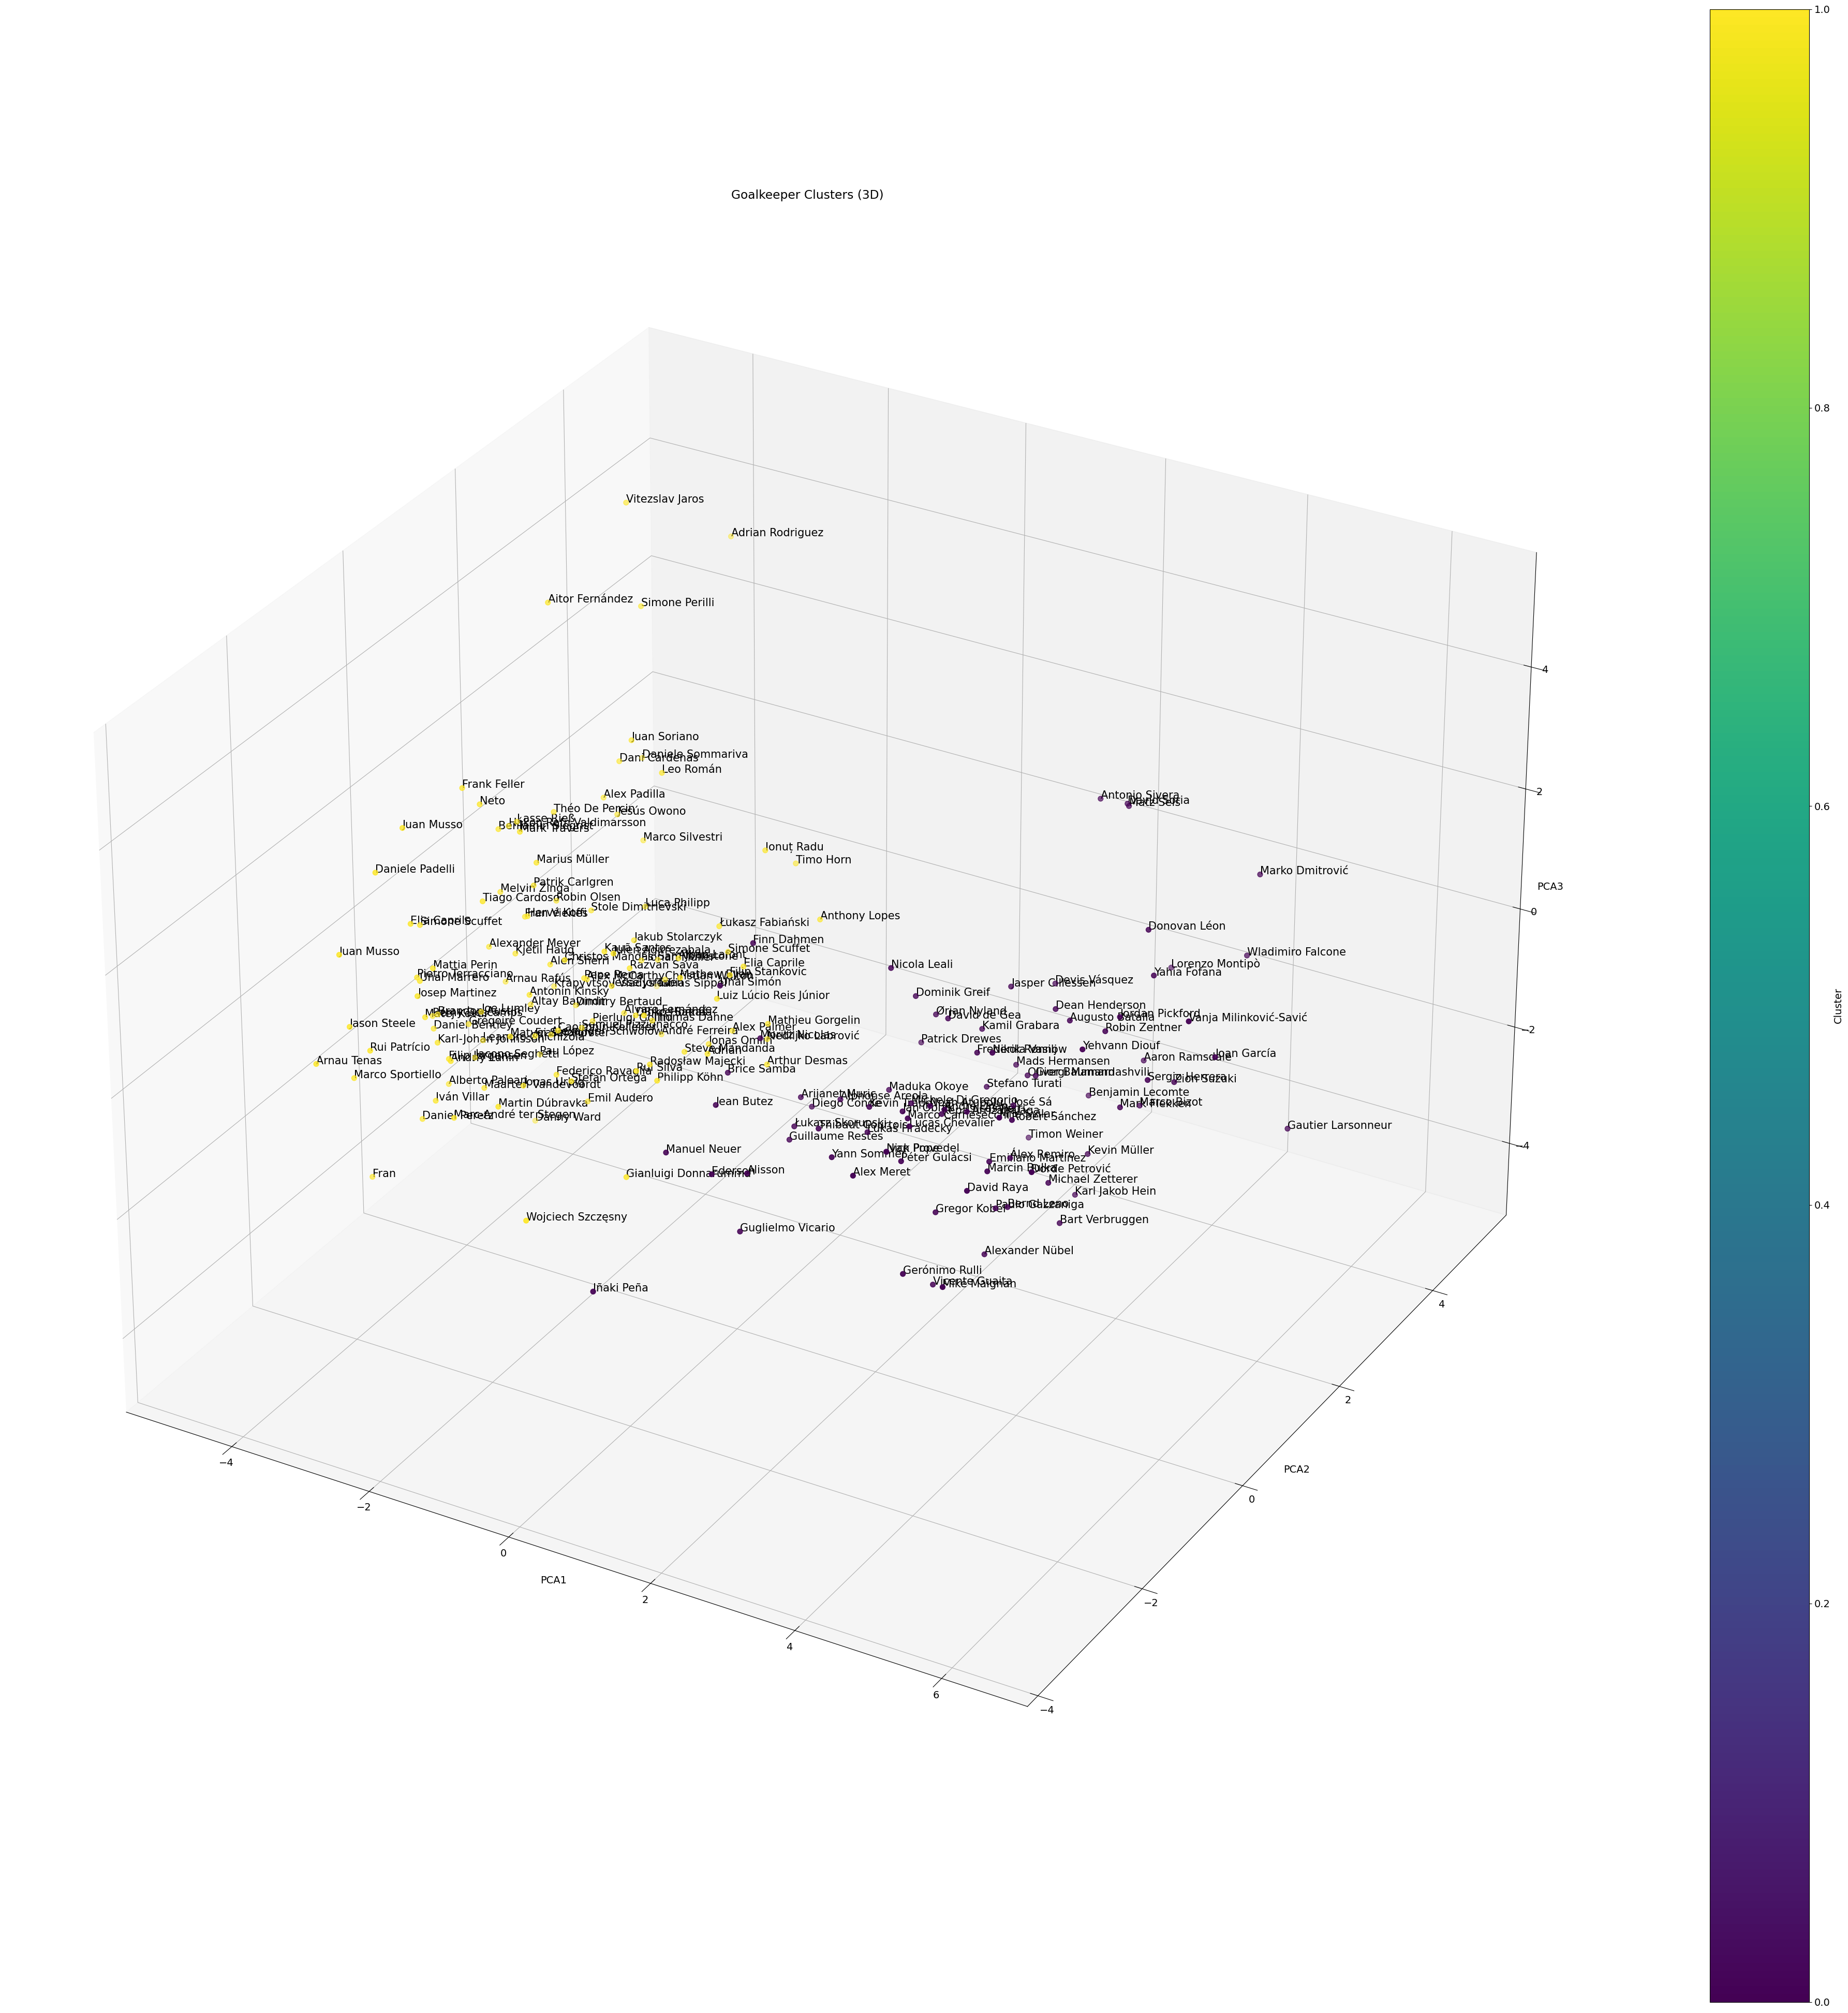

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(50, 50))
ax = fig.add_subplot(111, projection='3d')

# Reset index of goalkeepers_df to ensure alignment with scaled_goalkeepers_df
goalkeepers_df_reset = goalkeepers_df.reset_index(drop=True)

# Scatter plot
sc = ax.scatter3D(
    scaled_goalkeepers_df['pca1'],
    scaled_goalkeepers_df['pca2'],
    scaled_goalkeepers_df['pca3'],
    c=goalkeepers_df_reset['cluster'],  # Use the reset dataframe for cluster
    cmap='viridis',
    s=50
)

# Annotate player names
for i, player in enumerate(goalkeepers_df_reset['Player']):

    ax.text(
        scaled_goalkeepers_df['pca1'][i],
        scaled_goalkeepers_df['pca2'][i],
        scaled_goalkeepers_df['pca3'][i],
        player,
        size=15,  # font size
        zorder=1,
        color='black',

    )

# Axis labels
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Title and colorbar
plt.title('Goalkeeper Clusters (3D)')
plt.colorbar(sc, label='Cluster')

plt.show()

In [ ]:
def calc_pca(X_scaled):
  pca_temp=PCA()
  pca_temp.fit(X_scaled)
  cumsum = np.cumsum(pca_temp.explained_variance_ratio_)
  n_components = np.argmax(cumsum >= 0.95) + 1
  print(f"PCA components for 95% variance: {n_components}")
  pca = PCA(n_components=n_components)
  X_pca = pca.fit_transform(X_scaled)
  joblib.dump({'goalkeeper_pca':X_pca},'goalkeeper_pca.pkl')
  return X_pca

def calc_wcss(X_pca):
  WCSS = []
  K = range(1, 20)

  for i in K:
      kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
      kmeans.fit(X_pca)
      WCSS.append(kmeans.inertia_)

  plt.figure(figsize=(8,5))
  plt.plot(K, WCSS, marker='o')
  plt.xticks(K)
  plt.xlabel("Number of clusters (k)")
  plt.ylabel("WCSS")
  plt.title("Elbow Method (Goalkeepers)")
  plt.show()

def cluster_with_pca_features(X_pca,n):
  kmeans_pca=KMeans(n_clusters=n,random_state=42,init='k-means++')
  y_kmeans_pca=kmeans_pca.fit_predict(X_pca)
  return y_kmeans_pca

PCA components for 95% variance: 11


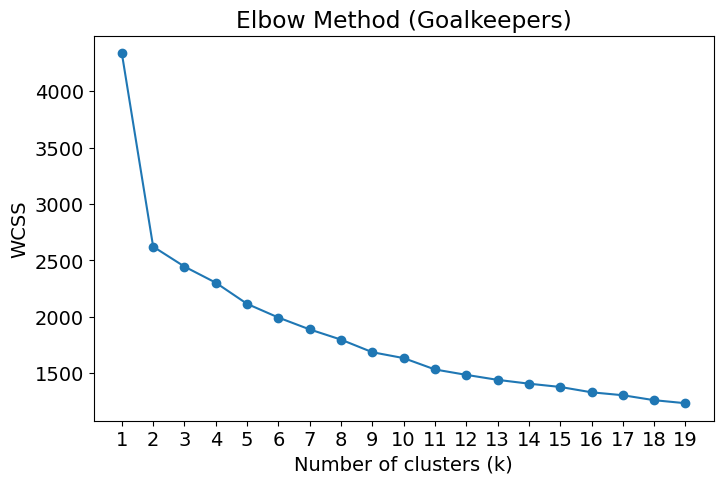

In [ ]:

calc_wcss(calc_pca(scaled_X_goalkeeper))

In [ ]:

copy_goalkeepers_df['cluster'] = cluster_with_pca_features(calc_pca(scaled_X_goalkeeper),2)
copy_goalkeepers_df.head()

PCA components for 95% variance: 11


Player  Nation Pos          Squad                Comp   Age  \
33               Adrián  es ESP  GK          Betis          es La Liga  37.0   
42   Julen Agirrezabala  es ESP  GK  Athletic Club          es La Liga  23.0   
87              Alisson  br BRA  GK      Liverpool  eng Premier League  31.0   
147     Alphonse Areola  fr FRA  GK       West Ham  eng Premier League  31.0   
160   Kepa Arrizabalaga  es ESP  GK    Bournemouth  eng Premier League  29.0   

       GA  GA90   SoTA  Saves   Stp  Stp%   CS  PKA  PKsv  PKm  PSxG  \
33   27.0  1.42   76.0   49.0  14.0   5.4  3.0  1.0   0.0  0.0  26.0   
42    9.0  0.67   34.0   24.0  20.0  14.0  5.0  1.0   1.0  0.0  10.5   
87   29.0  1.04  100.0   73.0  11.0   4.3  9.0  1.0   0.0  0.0  30.5   
147  41.0  1.63  115.0   77.0  15.0   3.8  5.0  0.0   0.0  0.0  35.4   
160  39.0  1.26  134.0   95.0  22.0   6.0  8.0  4.0   0.0  0.0  41.0   

     PSxG/SoT  PSxG+/-   /90  Att (GK)    Thr  Launch%  AvgLen  Recov    Opp  \
33       0.33     -1.0 -0.05     507.0   91.0     28.0    31.2     20  257.0   
42       0.27      1.5  0.11     341.0   51.0     37.5    33.9     21  143.0   
87       0.30      3.5  0.13     877.0  128.0     19.7    26.6     47  255.0   
147      0.31     -2.6 -0.10     788.0  119.0     34.4    32.1     29  394.0   
160      0.28      2.0  0.07     831.0  122.0     33.2    32.9     56  367.0   

     AvgDist  #OPA  cluster  
33      11.7  16.0        1  
42      14.2  17.0        1  
87      16.0  49.0        0  
147     15.0  30.0        0  
160     16.0  54.0        0

##### Stats of cluster after PCA

In [ ]:
pca_goalkeeper_cluster_0=(copy_goalkeepers_df[copy_goalkeepers_df['cluster']==0]).sort_values(by=new_cols,ascending=False)
pca_goalkeeper_cluster_1=(copy_goalkeepers_df[copy_goalkeepers_df['cluster']==1]).sort_values(by=new_cols,ascending=False)

In [ ]:
pca_aggregated_goalkeeper_df=copy_goalkeepers_df.groupby('cluster')[new_cols].mean()
pca_aggregated_goalkeeper_df
'''
psxG:post shot expect goals
psxg+/- post shot expect goals - goals allowd-postive means better keeper
att gk passes attempt
laucnh goals keeps launched percentage
thr : thorws attempt
avglen:avg pass len
#opa :def actions outside pen area
avgdits: avg dist from goal
opp:crosses faced
stp:crosses stoped
stp%successfull cross stopped percentage
'''

'\npsxG:post shot expect goals\npsxg+/- post shot expect goals - goals allowd-postive means better keeper\natt gk passes attempt\nlaucnh goals keeps launched percentage\nthr : thorws attempt\navglen:avg pass len\n#opa :def actions outside pen area\navgdits: avg dist from goal\nopp:crosses faced\nstp:crosses stoped\nstp%successfull cross stopped percentage\n'

In [ ]:
pca_aggregated_goalkeeper_df

GA      GA90        SoTA      Saves        Stp      Stp%  \
cluster                                                                    
0        42.329545  1.388068  130.500000  88.522727  26.965909  6.397727   
1        10.435897  1.620171   29.247863  18.991453   5.760684  6.174359   

               CS       PKA      PKsv       PKm       PSxG  PSxG/SoT  \
cluster                                                                
0        7.943182  3.340909  0.920455  0.125000  41.826136  0.299432   
1        1.555556  0.957265  0.111111  0.025641   9.855556  0.308974   

          PSxG+/-       /90    Att (GK)         Thr    Launch%     AvgLen  \
cluster                                                                     
0        0.769318  0.024091  926.784091  129.113636  34.059091  33.260227   
1       -0.289744 -0.076410  192.880342   28.615385  34.997436  33.387179   

             Recov         Opp    AvgDist       #OPA  
cluster                                               
0        41.806818  421.284091  14.179545  35.454545  
1         8.948718   93.376068  13.537607   7.316239

In [ ]:
pca_goalkeeper_cluster_0.head(5)


Player   Nation Pos          Squad                Comp  \
1449  Gautier Larsonneur   fr FRA  GK  Saint-Étienne          fr Ligue 1   
1463    Benjamin Lecomte   fr FRA  GK    Montpellier          fr Ligue 1   
1238     Karl Jakob Hein   ee EST  GK     Valladolid          es La Liga   
2172      Aaron Ramsdale  eng ENG  GK    Southampton  eng Premier League   
1814        Kevin Müller   de GER  GK     Heidenheim       de Bundesliga   

       Age    GA  GA90   SoTA  Saves   Stp  Stp%   CS   PKA  PKsv  PKm  PSxG  \
1449  27.0  77.0  2.26  209.0  132.0  24.0   4.7  5.0  13.0   2.0  0.0  73.5   
1463  33.0  68.0  2.27  173.0  107.0  20.0   4.9  1.0   6.0   1.0  0.0  57.3   
1238  22.0  68.0  2.19  163.0   96.0  34.0   7.2  5.0   4.0   0.0  0.0  58.8   
2172  26.0  66.0  2.20  188.0  120.0  25.0   5.5  3.0   5.0   2.0  0.0  63.5   
1814  33.0  64.0  1.96  169.0  105.0  21.0   4.6  7.0   6.0   0.0  0.0  59.3   

      PSxG/SoT  PSxG+/-   /90  Att (GK)    Thr  Launch%  AvgLen  Recov    Opp  \
1449      0.30     -1.5 -0.04     978.0  145.0     38.8    34.7     41  510.0   
1463      0.31     -5.7 -0.20     814.0  115.0     42.5    36.2     35  408.0   
1238      0.35     -8.2 -0.27     941.0  136.0     32.6    33.9     43  474.0   
2172      0.32     -2.5 -0.08    1026.0  129.0     44.6    36.0     23  457.0   
1814      0.33     -4.7 -0.14    1031.0  153.0     31.4    33.8     50  453.0   

      AvgDist  #OPA  cluster  
1449     14.0  33.0        0  
1463     14.3  26.0        0  
1238     14.0  34.0        0  
2172     11.7  20.0        0  
1814     12.0  20.0        0

In [ ]:
pca_goalkeeper_cluster_1.head(5)

Player   Nation Pos         Squad                Comp   Age  \
701       Arthur Desmas   fr FRA  GK      Le Havre          fr Ligue 1  30.0   
1042   Mathieu Gorgelin   fr FRA  GK      Le Havre          fr Ligue 1  33.0   
1433  Nediljko Labrović   hr CRO  GK      Augsburg       de Bundesliga  24.0   
2032        Alex Palmer  eng ENG  GK  Ipswich Town  eng Premier League  27.0   
33               Adrián   es ESP  GK         Betis          es La Liga  37.0   

        GA  GA90  SoTA  Saves   Stp  Stp%   CS  PKA  PKsv  PKm  PSxG  \
701   38.0  2.11  93.0   54.0  12.0   4.3  3.0  2.0   1.0  0.0  38.7   
1042  33.0  2.06  82.0   50.0  21.0   7.8  1.0  3.0   0.0  0.0  34.2   
1433  32.0  2.13  74.0   42.0  12.0   5.5  2.0  3.0   0.0  0.0  25.9   
2032  30.0  2.31  71.0   43.0  20.0   8.0  0.0  1.0   0.0  0.0  25.1   
33    27.0  1.42  76.0   49.0  14.0   5.4  3.0  1.0   0.0  0.0  26.0   

      PSxG/SoT  PSxG+/-   /90  Att (GK)   Thr  Launch%  AvgLen  Recov    Opp  \
701       0.40      0.7  0.04     404.0  72.0     28.5    30.9     12  277.0   
1042      0.40      2.2  0.14     435.0  75.0     32.9    32.4     16  269.0   
1433      0.32     -6.1 -0.40     397.0  72.0     38.8    35.2     14  217.0   
2032      0.35     -2.9 -0.22     329.0  55.0     36.8    33.9     17  249.0   
33        0.33     -1.0 -0.05     507.0  91.0     28.0    31.2     20  257.0   

      AvgDist  #OPA  cluster  
701      11.9   7.0        1  
1042     10.5   8.0        1  
1433     13.3  18.0        1  
2032     11.5  13.0        1  
33       11.7  16.0        1

##### Save Model

In [ ]:
import joblib
cluster_obj={
    'scaler':standard_scaler,
    'pca':pca,
    'kmeans':kmeans,
    'cluster_labels':[0,1]
}
joblib.dump(cluster_obj,'goalkeepercluster_obj.pkl')



['goalkeepercluster_obj.pkl']

#### KNN

##### Model Training

In [ ]:
from sklearn.neighbors import NearestNeighbors
goalkeeper_nn=NearestNeighbors(n_neighbors=5,metric='cosine',algorithm='auto')
X_pca=calc_pca(scaled_X_goalkeeper)
goalkeeper_nn.fit(X_pca)

PCA components for 95% variance: 11


NearestNeighbors(metric='cosine')

##### Get Similar Players

In [ ]:
def calc_similar_players(name,X_pca):
  if name in goalkeepers_df['Player'].values:
    player_index = goalkeepers_df.index.get_loc(goalkeepers_df[goalkeepers_df['Player'] == name].index[0])
    print(player_index)
    player_pca=X_pca[player_index].reshape(1,-1)
    distances, indices = goalkeeper_nn.kneighbors(player_pca, n_neighbors=4)
    distances = list(distances[0][1:4])
    distances.append(0)#so that the players own distance is made 0
    indices = list(indices[0][1:4])
    print(indices)
    indices.append(player_index)
    print(indices)
    similar_players=goalkeepers_df.iloc[indices]
    similar_players['distance']=distances
    return similar_players
  else:
    print("Player not found")

In [ ]:
calc_similar_players(input("Enter a players name:"),X_pca)

Enter a players name:x
Player not found


##### Save Model

In [ ]:
model_obj={
    'standard_scaler':standard_scaler,
    'pca':pca,
    'knn':goalkeeper_nn
}
joblib.dump(model_obj,'goalkeeper_nn_model.pkl')


['goalkeeper_nn_model.pkl']

In [ ]:
goalkeepers=goalkeepers_df['Player'].tolist()
joblib.dump({'goalkeepers':goalkeepers},'goalkeepers.pkl')

['goalkeepers.pkl']

### Outfield


In [ ]:
outfield_df=df[df['Pos']!='GK']
outfield_df.head()

Rk             Player   Nation    Pos        Squad                Comp  \
0   1         Max Aarons  eng ENG     DF  Bournemouth  eng Premier League   
1   2         Max Aarons  eng ENG  DF,MF     Valencia          es La Liga   
2   3     Rodrigo Abajas   es ESP     DF     Valencia          es La Liga   
3   4     James Abankwah   ie IRL  DF,MF      Udinese          it Serie A   
4   5  Keyliane Abdallah   fr FRA     FW    Marseille          fr Ligue 1   

    Age    Born  MP  Starts  Min  90s  Gls  Ast  G+A  G-PK  PK  PKatt  CrdY  \
0  24.0  2000.0   3       1   86  1.0    0    0    0     0   0      0     0   
1  24.0  2000.0   4       1  120  1.3    0    0    0     0   0      0     2   
2  21.0  2003.0   1       1   65  0.7    0    0    0     0   0      0     1   
3  20.0  2004.0   6       0   88  1.0    0    0    0     0   0      0     1   
4  18.0  2006.0   1       0    3  0.0    0    0    0     0   0      0     0   

   CrdR   xG  npxG  xAG  npxG+xAG  G+A-PK  xG+xAG  PrgC  PrgP  PrgR  Sh  SoT  \
0     0  0.0   0.0  0.0       0.0     0.0    0.00     1     8     3   0    0   
1     0  0.0   0.0  0.0       0.0     0.0    0.02     0     6    10   0    0   
2     0  0.1   0.1  0.0       0.1     0.0    0.10     3     2     3   1    0   
3     0  0.1   0.1  0.0       0.1     0.0    0.06     3     4     1   1    0   
4     0  0.0   0.0  0.0       0.0     0.0    0.00     1     0     0   0    0   

   SoT%  Sh/90  SoT/90  G/Sh  G/SoT  Dist  FK  PK_stats_shooting  \
0   NaN   0.00     0.0   NaN    NaN   NaN   0                  0   
1   NaN   0.00     0.0   NaN    NaN   NaN   0                  0   
2   0.0   1.38     0.0   0.0    NaN  24.5   0                  0   
3   0.0   1.02     0.0   0.0    NaN  15.0   0                  0   
4   NaN   0.00     0.0   NaN    NaN   NaN   0                  0   

   PKatt_stats_shooting  xG_stats_shooting  npxG_stats_shooting  npxG/Sh  \
0                     0                0.0                  0.0      NaN   
1                     0                0.0                  0.0      NaN   
2                     0                0.1                  0.1     0.07   
3                     0                0.1                  0.1     0.06   
4                     0                0.0                  0.0      NaN   

   G-xG  np:G-xG  Cmp  Att   Cmp%  TotDist  PrgDist  Ast_stats_passing  \
0   0.0      0.0   50   63   79.4      887      361                  0   
1   0.0      0.0   47   66   71.2      705      190                  0   
2  -0.1     -0.1   17   29   58.6      268      110                  0   
3  -0.1     -0.1   36   46   78.3      614      206                  0   
4   0.0      0.0    2    2  100.0       41        0                  0   

   xAG_stats_passing   xA  A-xAG  KP  1/3  PPA  CrsPA  PrgP_stats_passing  \
0                0.0  0.0    0.0   0    8    0      0                   8   
1                0.0  0.0    0.0   1    2    0      0                   6   
2                0.0  0.0    0.0   0    0    0      0                   2   
3                0.0  0.0    0.0   0    2    0      0                   4   
4                0.0  0.0    0.0   0    0    0      0                   0   

   Live  Dead  FK_stats_passing_types  TB  Sw  Crs  TI  CK  In  Out  Str  \
0    51    12                       2   0   0    2  10   0   0    0    0   
1    54    12                       1   0   0    5  11   0   0    0    0   
2    21     8                       0   0   0    1   8   0   0    0    0   
3    45     1                       1   0   0    0   0   0   0    0    0   
4     2     0                       0   0   0    0   0   0   0    0    0   

   Cmp_stats_passing_types  Tkl  TklW  Def 3rd  Mid 3rd  Att 3rd  \
0                       50    2     2        1        1        0   
1                       47    4     4        2        2        0   
2                       17    3     2        2        1        0   
3                       36    4     2        4        0        0   
4            

In [ ]:
outfield_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2642 entries, 0 to 2853
Columns: 165 entries, Rk to AvgDist
dtypes: float64(61), int64(99), object(5)
memory usage: 3.3+ MB


In [ ]:
outfield_df.describe()

Rk          Age         Born           MP       Starts  \
count  2642.000000  2634.000000  2634.000000  2642.000000  2642.000000   
mean   1412.838380    24.787016  1998.867122    19.196064    13.255110   
std     825.982125     4.395969     4.407788    11.345866    11.118515   
min       1.000000    15.000000  1983.000000     1.000000     0.000000   
25%     694.250000    21.000000  1996.000000     9.000000     3.000000   
50%    1406.500000    25.000000  1999.000000    20.000000    11.000000   
75%    2122.750000    28.000000  2002.000000    30.000000    22.750000   
max    2854.000000    40.000000  2008.000000    38.000000    38.000000   

               Min          90s          Gls          Ast          G+A  \
count  2642.000000  2642.000000  2642.000000  2642.000000  2642.000000   
mean   1189.457986    13.215481     1.817941     1.290689     3.108630   
std     942.184698    10.468931     3.239139     1.992674     4.634617   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     313.000000     3.500000     0.000000     0.000000     0.000000   
50%    1045.000000    11.600000     1.000000     0.000000     1.000000   
75%    1952.000000    21.700000     2.000000     2.000000     4.000000   
max    3420.000000    38.000000    31.000000    18.000000    47.000000   

              G-PK           PK        PKatt         CrdY         CrdR  \
count  2642.000000  2642.000000  2642.000000  2642.000000  2642.000000   
mean      1.664269     0.153671     0.194550     2.625662     0.121120   
std       2.860853     0.692254     0.805133     2.640578     0.359457   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     2.000000     0.000000   
75%       2.000000     0.000000     0.000000     4.000000     0.000000   
max      24.000000     9.000000     9.000000    15.000000     3.000000   

                xG         npxG          xAG     npxG+xAG       G+A-PK  \
count  2642.000000  2642.000000  2642.000000  2642.000000  2642.000000   
mean      1.843717     1.689591     1.307986     2.999319     0.195273   
std       2.885155     2.513928     1.719404     3.808933     0.258349   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.200000     0.200000     0.100000     0.400000     0.000000   
50%       0.800000     0.800000     0.700000     1.700000     0.100000   
75%       2.300000     2.100000     1.800000     4.100000     0.300000   
max      27.100000    24.000000    14.200000    32.400000     2.650000   

            xG+xAG         PrgC         PrgP         PrgR           Sh  \
count  2642.000000  2642.000000  2642.000000  2642.000000  2642.000000   
mean      0.242615    22.395155    48.802044    48.390992    16.331945   
std       0.277243    27.003874    50.435511    60.758288    19.267403   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.060000     3.000000     9.000000     5.000000     3.000000   
50%       0.165000    13.000000    34.000000    24.000000    10.000000   
75%       0.350000    31.000000    73.000000    72.000000    23.000000   
max       5.060000   213.000000   362.000000   488.000000   152.000000   

               SoT         SoT%        Sh/90       SoT/90         G/Sh  \
count  2642.000000  2327.000000  2642.000000  2642.000000  2327.000000   
mean      5.454201    29.881220     1.393232     0.462294     0.080387   
std       7.553895    19.929632     2.411977     1.907373     0.101752   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    18.200000     0.420000     0.000000     0.000000   
50%       3.000000    30.800000     0.940000     0.230000     0.060000   
75%       7.000000    40.000000     1.960000     0.630000     0.130000   
max      75.000000   100.000000    90.000000    90.000000     1.000000   

             G

In [ ]:
outfield_df.columns.to_list()

['Rk',
 'Player',
 'Nation',
 'Pos',
 'Squad',
 'Comp',
 'Age',
 'Born',
 'MP',
 'Starts',
 'Min',
 '90s',
 'Gls',
 'Ast',
 'G+A',
 'G-PK',
 'PK',
 'PKatt',
 'CrdY',
 'CrdR',
 'xG',
 'npxG',
 'xAG',
 'npxG+xAG',
 'G+A-PK',
 'xG+xAG',
 'PrgC',
 'PrgP',
 'PrgR',
 'Sh',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'Dist',
 'FK',
 'PK_stats_shooting',
 'PKatt_stats_shooting',
 'xG_stats_shooting',
 'npxG_stats_shooting',
 'npxG/Sh',
 'G-xG',
 'np:G-xG',
 'Cmp',
 'Att',
 'Cmp%',
 'TotDist',
 'PrgDist',
 'Ast_stats_passing',
 'xAG_stats_passing',
 'xA',
 'A-xAG',
 'KP',
 '1/3',
 'PPA',
 'CrsPA',
 'PrgP_stats_passing',
 'Live',
 'Dead',
 'FK_stats_passing_types',
 'TB',
 'Sw',
 'Crs',
 'TI',
 'CK',
 'In',
 'Out',
 'Str',
 'Cmp_stats_passing_types',
 'Tkl',
 'TklW',
 'Def 3rd',
 'Mid 3rd',
 'Att 3rd',
 'Att_stats_defense',
 'Tkl%',
 'Lost',
 'Blocks_stats_defense',
 'Sh_stats_defense',
 'Pass',
 'Int',
 'Tkl+Int',
 'Clr',
 'Err',
 'SCA',
 'SCA90',
 'PassLive',
 'PassDead',
 'TO',


In [ ]:
outfield_stats=['Player','Nation', 'Pos', 'Squad', 'Comp', 'Age','Gls', 'Ast', 'G-PK', 'PK', 'PKatt', 'xG', 'npxG', 'xAG', 'G-xG', 'np:G-xG', 'Sh', 'SoT', 'Sh/90', 'SoT/90', 'FK', 'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'xA', 'A-xAG', 'KP', '1/3', 'PPA', 'CrsPA', 'Live', 'TB', 'Sw', 'Crs', 'In', 'Out', 'Str', 'PrgC', 'PrgP', 'PrgR', 'SCA90', 'PassLive', 'PassDead', 'TO', 'Sh_stats_gca', 'Fld', 'Def', 'GCA90', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Lost', 'Int','Blocks_stats_defense', 'Clr', 'Err', 'Touches', 'Def Pen', 'Att Pen', 'Succ', 'Tkld', 'Carries', 'CPA', 'Mis', 'Dis', 'Rec', 'Won', 'Fls', 'PKwon', 'PKcon', 'Recov']
outfield_df=outfield_df[outfield_stats]
outfield_df.head()

Player   Nation    Pos        Squad                Comp   Age  \
0         Max Aarons  eng ENG     DF  Bournemouth  eng Premier League  24.0   
1         Max Aarons  eng ENG  DF,MF     Valencia          es La Liga  24.0   
2     Rodrigo Abajas   es ESP     DF     Valencia          es La Liga  21.0   
3     James Abankwah   ie IRL  DF,MF      Udinese          it Serie A  20.0   
4  Keyliane Abdallah   fr FRA     FW    Marseille          fr Ligue 1  18.0   

   Gls  Ast  G-PK  PK  PKatt   xG  npxG  xAG  G-xG  np:G-xG  Sh  SoT  Sh/90  \
0    0    0     0   0      0  0.0   0.0  0.0   0.0      0.0   0    0   0.00   
1    0    0     0   0      0  0.0   0.0  0.0   0.0      0.0   0    0   0.00   
2    0    0     0   0      0  0.1   0.1  0.0  -0.1     -0.1   1    0   1.38   
3    0    0     0   0      0  0.1   0.1  0.0  -0.1     -0.1   1    0   1.02   
4    0    0     0   0      0  0.0   0.0  0.0   0.0      0.0   0    0   0.00   

   SoT/90  FK  Cmp  Att   Cmp%  TotDist  PrgDist   xA  A-xAG  KP  1/3  PPA  \
0     0.0   0   50   63   79.4      887      361  0.0    0.0   0    8    0   
1     0.0   0   47   66   71.2      705      190  0.0    0.0   1    2    0   
2     0.0   0   17   29   58.6      268      110  0.0    0.0   0    0    0   
3     0.0   0   36   46   78.3      614      206  0.0    0.0   0    2    0   
4     0.0   0    2    2  100.0       41        0  0.0    0.0   0    0    0   

   CrsPA  Live  TB  Sw  Crs  In  Out  Str  PrgC  PrgP  PrgR  SCA90  PassLive  \
0      0    51   0   0    2   0    0    0     1     8     3   2.09         2   
1      0    54   0   0    5   0    0    0     0     6    10   0.75         1   
2      0    21   0   0    1   0    0    0     3     2     3   0.00         0   
3      0    45   0   0    0   0    0    0     3     4     1   1.02         1   
4      0     2   0   0    0   0    0    0     1     0     0   0.00         0   

   PassDead  TO  Sh_stats_gca  Fld  Def  GCA90  Tkl  TklW  Def 3rd  Mid 3rd  \
0         0   0             0    0    0    0.0    2     2        1        1   
1         0   0             0    0    0    0.0    4     4        2        2   
2         0   0             0    0    0    0.0    3     2        2        1   
3         0   0             0    0    0    0.0    4     2        4        0   
4         0   0             0    0    0    0.0    1     1        1        0   

   Att 3rd  Lost  Int  Blocks_stats_defense  Clr  Err  Touches  Def Pen  \
0        0     0    1                     3    0    0       73        2   
1        0     1    0                     1    3    0       85        1   
2        0     0    1                     1    0    0       36        1   
3        0     1    1                     2    3    0       65        8   
4        0     0    0                     0    0    0        4        0   

   Att Pen  Succ  Tkld  Carries  CPA  Mis  Dis  Rec  Won  Fls  PKwon  PKcon  \
0        0     0     1       41    0    1    0   40    0    0      0      0   
1        0     1     2       46    0    3    1   49    2    0      0      0   
2        1     1     0       13    1    0    2   16    0    2      0      0   
3        2     0     0       29    1    1    3   34    2    4      0      0   
4        0     0     0        1    0    1    0    3    0    0      0      0   

   Recov  
0      7  
1      7  
2      2  
3      7  
4      0

In [ ]:
outfield_df.isna().sum()

Player    0
Nation    7
Pos       0
Squad     0
Comp      0
         ..
Won       0
Fls       0
PKwon     0
PKcon     0
Recov     0
Length: 75, dtype: int64

In [ ]:
outfield_df.dropna(inplace=True)
outfield_df.to_csv('outfield.csv',index=False)

In [ ]:
copy_outfield_df=outfield_df.copy()
outfield_df.isna().sum()

Player    0
Nation    0
Pos       0
Squad     0
Comp      0
         ..
Won       0
Fls       0
PKwon     0
PKcon     0
Recov     0
Length: 75, dtype: int64

#### Clustering

##### Standardization


In [ ]:

standard_scaler=StandardScaler()
standard_scaler.fit(outfield_df.drop(['Player','Nation','Pos','Squad','Comp','Age'],axis=1))
scaled_X_outfield=standard_scaler.transform(outfield_df.drop(['Player','Nation','Pos','Squad','Comp','Age'],axis=1))

##### Elbow Method

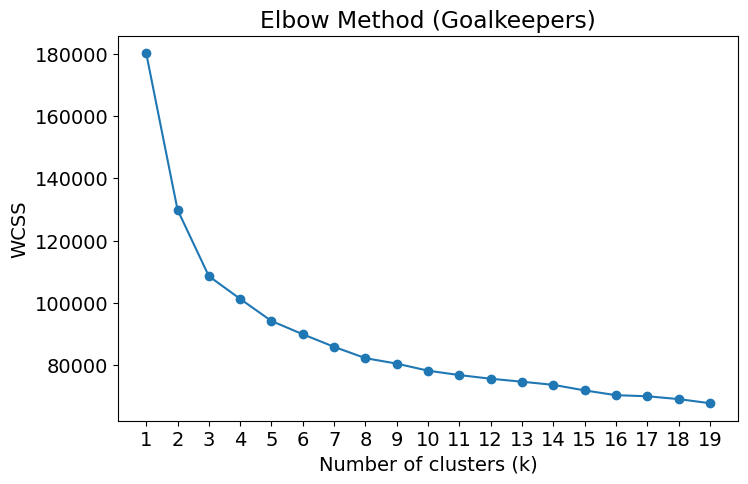

In [ ]:
WCSS = []
K = range(1, 20)

for i in K:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_X_outfield)
    WCSS.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, WCSS, marker='o')
plt.xticks(K)
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method (Goalkeepers)")
plt.show()


##### Model Training

In [ ]:
# we get number of clusters to be 3
kmeans = KMeans(n_clusters=3, random_state=42,init='k-means++')

# Fit the K-means model to the scaled data and obtain the cluster labels for each data point
y_kmeans = kmeans.fit_predict(scaled_X_outfield)
outfield_df['cluster'] = y_kmeans
outfield_df.head()

Player   Nation    Pos        Squad                Comp   Age  \
0         Max Aarons  eng ENG     DF  Bournemouth  eng Premier League  24.0   
1         Max Aarons  eng ENG  DF,MF     Valencia          es La Liga  24.0   
2     Rodrigo Abajas   es ESP     DF     Valencia          es La Liga  21.0   
3     James Abankwah   ie IRL  DF,MF      Udinese          it Serie A  20.0   
4  Keyliane Abdallah   fr FRA     FW    Marseille          fr Ligue 1  18.0   

   Gls  Ast  G-PK  PK  PKatt   xG  npxG  xAG  G-xG  np:G-xG  Sh  SoT  Sh/90  \
0    0    0     0   0      0  0.0   0.0  0.0   0.0      0.0   0    0   0.00   
1    0    0     0   0      0  0.0   0.0  0.0   0.0      0.0   0    0   0.00   
2    0    0     0   0      0  0.1   0.1  0.0  -0.1     -0.1   1    0   1.38   
3    0    0     0   0      0  0.1   0.1  0.0  -0.1     -0.1   1    0   1.02   
4    0    0     0   0      0  0.0   0.0  0.0   0.0      0.0   0    0   0.00   

   SoT/90  FK  Cmp  Att   Cmp%  TotDist  PrgDist   xA  A-xAG  KP  1/3  PPA  \
0     0.0   0   50   63   79.4      887      361  0.0    0.0   0    8    0   
1     0.0   0   47   66   71.2      705      190  0.0    0.0   1    2    0   
2     0.0   0   17   29   58.6      268      110  0.0    0.0   0    0    0   
3     0.0   0   36   46   78.3      614      206  0.0    0.0   0    2    0   
4     0.0   0    2    2  100.0       41        0  0.0    0.0   0    0    0   

   CrsPA  Live  TB  Sw  Crs  In  Out  Str  PrgC  PrgP  PrgR  SCA90  PassLive  \
0      0    51   0   0    2   0    0    0     1     8     3   2.09         2   
1      0    54   0   0    5   0    0    0     0     6    10   0.75         1   
2      0    21   0   0    1   0    0    0     3     2     3   0.00         0   
3      0    45   0   0    0   0    0    0     3     4     1   1.02         1   
4      0     2   0   0    0   0    0    0     1     0     0   0.00         0   

   PassDead  TO  Sh_stats_gca  Fld  Def  GCA90  Tkl  TklW  Def 3rd  Mid 3rd  \
0         0   0             0    0    0    0.0    2     2        1        1   
1         0   0             0    0    0    0.0    4     4        2        2   
2         0   0             0    0    0    0.0    3     2        2        1   
3         0   0             0    0    0    0.0    4     2        4        0   
4         0   0             0    0    0    0.0    1     1        1        0   

   Att 3rd  Lost  Int  Blocks_stats_defense  Clr  Err  Touches  Def Pen  \
0        0     0    1                     3    0    0       73        2   
1        0     1    0                     1    3    0       85        1   
2        0     0    1                     1    0    0       36        1   
3        0     1    1                     2    3    0       65        8   
4        0     0    0                     0    0    0        4        0   

   Att Pen  Succ  Tkld  Carries  CPA  Mis  Dis  Rec  Won  Fls  PKwon  PKcon  \
0        0     0     1       41    0    1    0   40    0    0      0      0   
1        0     1     2       46    0    3    1   49    2    0      0      0   
2        1     1     0       13    1    0    2   16    0    2      0      0   
3        2     0     0       29    1    1    3   34    2    4      0      0   
4        0     0     0        1    0    1    0    3    0    0      0      0   

   Recov  cluster  
0      7        1  
1      7        1  
2      2        1  
3      7        1  
4      0        1

##### Stats of cluster before PCA

In [ ]:
new_cols=['Gls', 'Ast', 'G-PK', 'PK', 'PKatt', 'xG', 'npxG', 'xAG', 'G-xG', 'np:G-xG', 'Sh', 'SoT', 'Sh/90', 'SoT/90', 'FK', 'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'xA', 'A-xAG', 'KP', '1/3', 'PPA', 'CrsPA', 'Live', 'TB', 'Sw', 'Crs', 'In', 'Out', 'Str', 'PrgC', 'PrgP', 'PrgR', 'SCA90', 'PassLive', 'PassDead', 'TO', 'Sh_stats_gca', 'Fld', 'Def', 'GCA90', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Lost', 'Int','Blocks_stats_defense', 'Clr', 'Err', 'Touches', 'Def Pen', 'Att Pen', 'Succ', 'Tkld', 'Carries', 'CPA', 'Mis', 'Dis', 'Rec', 'Won', 'Fls', 'PKwon', 'PKcon', 'Recov']
aggregated_outfield_df=outfield_df.groupby('cluster')[new_cols].mean()
aggregated_outfield_df

Gls       Ast      G-PK        PK     PKatt        xG      npxG  \
cluster                                                                         
0        7.765896  4.479769  6.924855  0.841040  1.057803  7.072832  6.243642   
1        0.743606  0.478261  0.703964  0.039642  0.056266  0.893990  0.848977   
2        1.348506  1.576102  1.273115  0.075391  0.085349  1.448222  1.377667   

              xAG      G-xG   np:G-xG         Sh        SoT     Sh/90  \
cluster                                                                 
0        4.296821  0.693064  0.681214  53.364162  20.026012  2.243179   
1        0.538683 -0.150384 -0.145013   7.975064   2.614450  1.442084   
2        1.594879 -0.098293 -0.103129  17.287340   4.793741  0.728506   

           SoT/90        FK          Cmp          Att       Cmp%  \
cluster                                                            
0        0.845983  1.690751   642.765896   849.060694  74.254913   
1        0.429220  0.195013   192.206522   240.599105  76.706841   
2        0.204922  0.517781  1086.122333  1291.419630  83.199004   

              TotDist      PrgDist        xA     A-xAG         KP        1/3  \
cluster                                                                        
0         9976.144509  2670.768786  3.923410  0.182948  36.277457  51.635838   
1         3179.790281   959.510870  0.499680 -0.060422   5.200128  14.413683   
2        18929.893314  6231.244666  1.723898 -0.018777  16.733997  90.466572   

               PPA     CrsPA         Live        TB        Sw        Crs  \
cluster                                                                    
0        29.699422  6.702312   773.728324  6.459538  5.456647  65.736994   
1         4.044118  1.210358   219.753197  0.680946  1.217391   9.956522   
2        15.149360  4.591750  1180.088193  2.568990  7.254623  33.506401   

                In       Out       Str       PrgC       PrgP        PrgR  \
cluster                                                                    
0        11.202312  7.251445  0.187861  66.644509  86.488439  161.939306   
1         1.118926  0.787084  0.021739   9.687340  18.526854   23.644501   
2         3.301565  2.524893  0.075391  29.726885  99.338549   49.344239   

            SCA90   PassLive  PassDead        TO  Sh_stats_gca       Fld  \
cluster                                                                    
0        3.376127  54.841040  7.523121  6.390173      5.887283  4.462428   
1        2.195953   8.922634  0.906010  0.735934      0.914322  0.658568   
2        1.758649  32.731152  3.502134  1.109531      2.000000  1.270270   

              Def     GCA90        Tkl       TklW    Def 3rd    Mid 3rd  \
cluster                                                                   
0        1.052023  0.421850  29.052023  17.401734  10.135838  12.046243   
1        0.215473  0.186228   9.668798   5.784527   4.404092   3.852941   
2        0.886202  0.177112  46.112376  28.069701  23.638691  17.722617   

          Att 3rd       Lost        Int  Blocks_stats_defense        Clr  \
cluster                                                                    
0        6.869942  16.771676  10.239884             20.127168  19.933526   
1        1.411765   4.496164   4.465473              6.336317  13.302430   
2        4.751067  17.830725  25.469417             29.240398  76.834993   

              Err      Touches     Def Pen     Att Pen       Succ       Tkld  \
cluster                                                                        
0        0.812139  1125.546243   23.609827  100.280347  31.005780  35.419075   
1        0.295396   308.702046   18.569693   14.102302   4.363171   5.255115   
2        1.658606  1547.011380  118.322902   28.173542  11.231863  10.295875   

            Carries        CPA        Mis        Dis         Rec        Won  \
cluster                                                                       
0        669.771676  26.346821  55.078035

In [ ]:
outfield_cluster_0=(outfield_df[outfield_df['cluster']==0]).sort_values(by=new_cols,ascending=False)
outfield_cluster_1=(outfield_df[outfield_df['cluster']==1]).sort_values(by=new_cols,ascending=False)
outfield_cluster_2=(outfield_df[outfield_df['cluster']==2]).sort_values(by=new_cols,ascending=False)

In [ ]:
outfield_cluster_0.head(15)

Player   Nation    Pos            Squad                Comp  \
1691       Kylian Mbappé   fr FRA     FW      Real Madrid          es La Liga   
2304       Mohamed Salah   eg EGY     FW        Liverpool  eng Premier League   
1483  Robert Lewandowski   pl POL     FW        Barcelona          es La Liga   
1317          Harry Kane  eng ENG     FW    Bayern Munich       de Bundesliga   
2201       Mateo Retegui   it ITA     FW         Atalanta          it Serie A   
1219      Alexander Isak   se SWE     FW    Newcastle Utd  eng Premier League   
1109      Erling Haaland   no NOR     FW  Manchester City  eng Premier League   
697      Ousmane Dembélé   fr FRA     FW        Paris S-G          fr Ligue 1   
1060     Mason Greenwood  eng ENG  FW,MF        Marseille          fr Ligue 1   
1093     Serhou Guirassy   gn GUI     FW         Dortmund       de Bundesliga   
405         Ante Budimir   hr CRO     FW          Osasuna          es La Liga   
2369       Patrik Schick   cz CZE     FW       Leverkusen       de Bundesliga   
1693        Bryan Mbeumo   cm CMR     FW        Brentford  eng Premier League   
2787          Chris Wood   nz NZL     FW  Nott'ham Forest  eng Premier League   
2539   Alexander Sørloth   no NOR     FW  Atlético Madrid          es La Liga   

       Age  Gls  Ast  G-PK  PK  PKatt    xG  npxG   xAG  G-xG  np:G-xG   Sh  \
1691  25.0   31    3    24   7      9  25.9  18.6   7.7   5.1      5.4  152   
2304  32.0   29   18    20   9      9  25.2  18.2  14.2   3.8      1.8  121   
1483  35.0   27    2    24   3      4  27.1  24.0   2.3  -0.1      0.0  111   
1317  31.0   26    9    17   9      9  20.3  13.3   5.3   5.7      3.7  105   
2201  25.0   25    8    21   4      5  18.9  14.9   4.9   6.1      6.1   99   
1219  24.0   23    6    19   4      4  20.3  17.2   4.3   2.7      1.8   95   
1109  24.0   22    3    19   3      4  22.0  18.8   3.0   0.0      0.2  104   
697   27.0   21    6    20   1      1  16.6  15.8   8.2   4.4      4.2   96   
1060  22.0   21    5    14   7      9  16.3   9.1   5.7   4.7      4.9  111   
1093  28.0   21    4    18   3      4  22.7  19.6   3.9  -1.7     -1.6   86   
405   33.0   21    4    13   8      8  18.3  12.3   1.7   2.7      0.7   91   
2369  28.0   21    0    20   1      1  12.7  11.9   0.6   8.3      8.1   68   
1693  24.0   20    7    15   5      6  12.3   7.5   8.3   7.7      7.5   79   
2787  32.0   20    3    17   3      3  13.4  11.0   2.6   6.6      6.0   65   
2539  28.0   20    2    19   1      1  16.8  16.0   1.6   3.2      3.0   78   

      SoT  Sh/90  SoT/90  FK   Cmp   Att  Cmp%  TotDist  PrgDist   xA  A-xAG  \
1691   75   4.71    2.32   3   949  1145  82.9    13622     2382  6.6   -4.7   
2304   50   3.23    1.33   1   892  1263  70.6    13343     3919  9.1    3.8   
1483   45   3.75    1.52   5   383   522  73.4     4856      900  1.5   -0.3   
1317   45   3.97    1.70   6   509   645  78.9     9141     2258  5.6    3.7   
2201   32   3.74    1.21   2   440   575  76.5     6210      971  2.2    3.1   
1219   41   3.10    1.34   3   519   689  75.3     7434     1644  3.6    1.7   
1109   55   3.42    1.81   1   255   381  66.9     3086      593  2.0    0.0   
697    49   4.99    2.55   0   844  1068  79.0    13453     3685  7.2   -2.2   
1060   45   3.56    1.44   3  1089  1389  78.4    18128     4250  7.8   -0.7   
1093   33   2.98    1.14   1   456   627  72.7     5726      933  3.1    0.1   
405    29   2.77    0.88   0   239   426  56.1     3022      503  1.2    2.3   
2369   32   3.63    1.71   0   287   368  78.0     3565      473  0.9   -0.6   
1693   34   2.08    0.90   6   872  1319  66.1    13902     4325  9.3   -1.3   
2787   32   1.98    0.97   0   315   490  64.3     4434     1018  1.5    0.4   
2539   40   4.48    2.30   0   229   359  63.8     2905      601  0.7    0.4   

      KP  1/3  PPA  CrsPA  Live  TB  Sw  Crs  In  Out  Str  PrgC  PrgP  PrgR  \
1691  51   75   52      3  1074   6  19   35   0    0    0   150   140   386   
2304  88   53  

In [ ]:
outfield_cluster_0.tail(10)

Player   Nation    Pos            Squad                Comp  \
2358               Sávio   br BRA  FW,MF  Manchester City  eng Premier League   
2823      Bryan Zaragoza   es ESP  FW,MF          Osasuna          es La Liga   
1486  Keane Lewis-Potter  eng ENG  DF,FW        Brentford  eng Premier League   
869         Alieu Fadera   gm GAM  FW,DF             Como          it Serie A   
742           Andy Diouf   fr FRA     MF             Lens          fr Ligue 1   
837         Adri Embarba   es ESP  FW,MF   Rayo Vallecano          es La Liga   
1129       Jack Harrison  eng ENG     FW          Everton  eng Premier League   
2555        Nuno Tavares   pt POR     DF            Lazio          it Serie A   
754                 Dodô   br BRA     DF       Fiorentina          it Serie A   
215      Alejandro Balde   es ESP     DF        Barcelona          es La Liga   

       Age  Gls  Ast  G-PK  PK  PKatt   xG  npxG  xAG  G-xG  np:G-xG  Sh  SoT  \
2358  20.0    1    8     1   0      0  5.0   5.0  6.9  -4.0     -4.0  55   21   
2823  23.0    1    6     1   0      0  2.7   2.7  3.2  -1.7     -1.7  42   13   
1486  23.0    1    3     1   0      0  3.1   3.1  3.2  -2.1     -2.1  28   14   
869   22.0    1    3     1   0      0  1.7   1.7  4.0  -0.7     -0.7  28    9   
742   21.0    1    2     1   0      0  2.9   2.9  2.8  -1.9     -1.9  40    5   
837   32.0    1    1     1   0      0  2.1   2.1  2.7  -1.1     -1.1  37   12   
1129  27.0    1    0     1   0      0  3.5   3.5  3.7  -2.5     -2.5  29    7   
2555  24.0    0    8     0   0      0  1.1   1.1  4.8  -1.1     -1.1  28    5   
754   25.0    0    4     0   0      0  1.4   1.4  4.2  -1.4     -1.4  25    5   
215   20.0    0    4     0   0      0  0.5   0.5  3.4  -0.5     -0.5  12    3   

      Sh/90  SoT/90  FK   Cmp   Att  Cmp%  TotDist  PrgDist   xA  A-xAG  KP  \
2358   2.80    1.07   1   692   856  80.8    10296     1727  6.1    1.1  46   
2823   2.06    0.64   0   358   554  64.6     6526     1835  5.1    2.8  36   
1486   0.81    0.41   1   982  1273  77.1    16310     5025  4.9   -0.2  26   
869    1.53    0.49   0   441   591  74.6     6233     1638  1.9   -1.0  23   
742    1.62    0.20   0   849  1068  79.5    11438     2865  3.3   -0.8  33   
837    2.07    0.67   2   383   599  63.9     6104     1485  2.5   -1.7  20   
1129   1.26    0.30   0   414   659  62.8     6596     2477  3.1   -3.7  33   
2555   1.49    0.27   5   820  1042  78.7    13097     5090  4.9    3.2  33   
754    0.74    0.15   0  1341  1728  77.6    24063     7341  4.3   -0.2  36   
215    0.47    0.12   0  1306  1484  88.0    19158     3986  2.8    0.6  26   

      1/3  PPA  CrsPA  Live  TB  Sw  Crs  In  Out  Str  PrgC  PrgP  PrgR  \
2358   19   47      8   824   5   7   84  10    2    0   137    67   246   
2823   23   34     20   484   4   5  104  10    5    0   105    50   140   
1486   69   47     18  1112   5   9   78   2    0    0    98    98   156   
869    14   24      5   541   3   3   39   0    0    0    74    36   160   
742    60   31      3  1030  13   2   30   8    3    0    82   116    94   
837    23   17     10   527   4   2  114  20    9    0    47    45   114   
1129   28   25     11   588   4   2  131  27    0    1    73    51   127   
2555   69   44     23   854   2   6  126   4    4    0    98   111   100   
754    80   40     22  1456   2  10  142   0    1    0   143   128   193   
215    51   39     11  1287   3   2   67   0    0    0   107    93   246   

      SCA90  PassLive  PassDead  TO  Sh_stats_gca  Fld  Def  GCA90  Tkl  TklW  \
2358   5.66        80         2  15             4    7    3   0.76   23    17   
2823   3.49        41        11  13             1    5    0   0.44   13     9   
1486   2.07        56         0   5             3    6    1   0.23   49    27   
869    2.95        37         1   5             3    6    2   0.38   64    47   
742    3.44        63         1  11             7    2    1   0.12   37    26   
837    2.58        28        10   1      

In [ ]:
outfield_cluster_1.head(15)


Player  Nation    Pos          Squad                Comp  \
2514   Cristhian Stuani  uy URU     FW         Girona          es La Liga   
2171      Gonçalo Ramos  pt POR     FW      Paris S-G          fr Ligue 1   
347         Myron Boadu  nl NED     FW         Bochum       de Bundesliga   
1479     Esteban Lepaul  fr FRA     FW         Angers          fr Ligue 1   
360     Victor Boniface  ng NGA     FW     Leverkusen       de Bundesliga   
1128        Phil Harres  de GER     FW  Holstein Kiel       de Bundesliga   
1820      Rodrigo Muniz  br BRA     FW         Fulham  eng Premier League   
1379  Randal Kolo Muani  fr FRA     FW       Juventus          it Serie A   
1102     Gorka Guruzeta  es ESP     FW  Athletic Club          es La Liga   
2422      Abdallah Sima  sn SEN  FW,MF          Brest          fr Ligue 1   
1448         Cyle Larin  ca CAN     FW       Mallorca          es La Liga   
798         Jáder Durán  co COL     FW    Aston Villa  eng Premier League   
1210        Andrej Ilic  rs SRB     FW   Union Berlin       de Bundesliga   
1279         Diogo Jota  pt POR     FW      Liverpool  eng Premier League   
1930       M'Bala Nzola  ao ANG     FW           Lens          fr Ligue 1   

       Age  Gls  Ast  G-PK  PK  PKatt    xG  npxG  xAG  G-xG  np:G-xG  Sh  \
2514  37.0   11    2     8   3      3   8.1   5.8  0.6   2.9      2.2  31   
2171  23.0   10    3     8   2      3  13.6  11.3  2.2  -3.6     -3.3  52   
347   23.0    9    1     8   1      1   7.7   6.9  1.1   1.3      1.1  27   
1479  24.0    9    0     9   0      0   5.1   5.1  0.8   3.9      3.9  41   
360   23.0    8    1     8   0      1   7.8   7.1  1.1   0.2      0.9  50   
1128  22.0    8    1     8   0      0   5.9   5.9  1.3   2.1      2.1  37   
1820  23.0    8    1     8   0      0   5.8   5.8  0.7   2.2      2.2  39   
1379  25.0    8    1     7   1      1   4.7   3.9  1.6   3.3      3.1  25   
1102  27.0    7    2     7   0      0   6.7   6.6  1.5   0.3      0.4  59   
2422  23.0    7    2     7   0      0   5.9   5.9  1.0   1.1      1.1  37   
1448  29.0    7    2     6   1      1   6.9   6.1  1.4   0.1     -0.1  38   
798   20.0    7    0     7   0      0   4.9   4.9  0.2   2.1      2.1  31   
1210  24.0    7    0     6   1      1   4.9   4.1  0.3   2.1      1.9  27   
1279  27.0    6    3     6   0      0   7.9   7.9  1.8  -1.9     -1.9  51   
1930  27.0    6    1     6   0      0   8.6   8.6  1.3  -2.6     -2.6  47   

      SoT  Sh/90  SoT/90  FK  Cmp  Att  Cmp%  TotDist  PrgDist   xA  A-xAG  \
2514   16   2.59    1.34   0  107  154  69.5     1450      161  1.0    1.4   
2171   29   4.39    2.45   0  193  241  80.1     2279      367  1.4    0.8   
347    13   2.33    1.12   0  139  195  71.3     2358      375  1.6   -0.1   
1479   17   2.27    0.94   0  241  359  67.1     3512      623  1.7   -0.8   
360    17   4.46    1.52   0  172  245  70.2     2453      503  1.0   -0.1   
1128   17   2.16    0.99   0  150  265  56.6     2460      482  1.1   -0.3   
1820   19   3.64    1.77   0   92  142  64.8     1540      528  0.2    0.3   
1379   13   1.94    1.01   0  151  216  69.9     1910      347  0.8   -0.6   
1102   19   2.89    0.93   0  298  411  72.5     4403      655  0.7    0.5   
2422   18   2.69    1.31   0  231  332  69.6     3140      660  0.9    1.0   
1448   14   1.94    0.71   0  214  317  67.5     2655      399  0.4    0.6   
798    15   4.37    2.12   0  115  163  70.6     1558      307  0.3   -0.2   
1210   11   2.59    1.06   0  110  191  57.6     1223      314  0.2   -0.3   
1279   13   3.84    0.98   0  216  310  69.7     3313      829  1.1    1.2   
1930   18   2.90    1.11   0  227  302  75.2     2579      415  0.9   -0.3   

      KP  1/3  PPA  CrsPA  Live  TB  Sw  Crs  In  Out  Str  PrgC  PrgP  PrgR  \
2514   6    1    3      0   133   1   0    2   0    0    0     2    10    36   
2171  15    9    9      0   237   2   0    1   0    0    0    11    24    63   
347   11    7    5      1   183   0   0    3   0    0    0    

In [ ]:
outfield_cluster_1.tail(10)

Player   Nation    Pos          Squad                Comp   Age  \
1983       Ike Orazi   ie IRL     MF          Reims          fr Ligue 1  17.0   
2126   Nicola Pintus   it ITA     DF       Cagliari          it Serie A  19.0   
1999   Jibril Othman   tn TUN     FW  Saint-Étienne          fr Ligue 1  20.0   
1471    Nunzio Lella   it ITA     MF        Venezia          it Serie A  24.0   
658     Jayden Danns  eng ENG     MF      Liverpool  eng Premier League  18.0   
691   Thomas Delaine   fr FRA     DF     Strasbourg          fr Ligue 1  32.0   
1952      Yllan Okou   fr FRA     DF  Hellas Verona          it Serie A  21.0   
942    Darío Fuentes   es ESP     DF        Sevilla          es La Liga  21.0   
1446  Will Lankshear  eng ENG  FW,MF      Tottenham  eng Premier League  19.0   
1713     Mateo Mejía   es ESP     FW        Sevilla          es La Liga  21.0   

      Gls  Ast  G-PK  PK  PKatt   xG  npxG  xAG  G-xG  np:G-xG  Sh  SoT  \
1983    0    0     0   0      0  0.0   0.0  0.0   0.0      0.0   0    0   
2126    0    0     0   0      0  0.0   0.0  0.0   0.0      0.0   0    0   
1999    0    0     0   0      0  0.0   0.0  0.0   0.0      0.0   0    0   
1471    0    0     0   0      0  0.0   0.0  0.0   0.0      0.0   0    0   
658     0    0     0   0      0  0.0   0.0  0.0   0.0      0.0   0    0   
691     0    0     0   0      0  0.0   0.0  0.0   0.0      0.0   0    0   
1952    0    0     0   0      0  0.0   0.0  0.0   0.0      0.0   0    0   
942     0    0     0   0      0  0.0   0.0  0.0   0.0      0.0   0    0   
1446    0    0     0   0      0  0.0   0.0  0.0   0.0      0.0   0    0   
1713    0    0     0   0      0  0.0   0.0  0.0   0.0      0.0   0    0   

      Sh/90  SoT/90  FK  Cmp  Att   Cmp%  TotDist  PrgDist   xA  A-xAG  KP  \
1983    0.0     0.0   0    1    1  100.0       11        0  0.0    0.0   0   
2126    0.0     0.0   0    1    1  100.0       11        0  0.0    0.0   0   
1999    0.0     0.0   0    1    1  100.0       10        0  0.0    0.0   0   
1471    0.0     0.0   0    1    1  100.0        6        0  0.0    0.0   0   
658     0.0     0.0   0    1    1  100.0        6        0  0.0    0.0   0   
691     0.0     0.0   0    0    4    0.0        0        0  0.0    0.0   0   
1952    0.0     0.0   0    0    2    0.0        0        0  0.0    0.0   0   
942     0.0     0.0   0    0    2    0.0        0        0  0.0    0.0   0   
1446    0.0     0.0   0    0    1    0.0        0        0  0.0    0.0   0   
1713    0.0     0.0   0    0    1    0.0        0        0  0.0    0.0   0   

      1/3  PPA  CrsPA  Live  TB  Sw  Crs  In  Out  Str  PrgC  PrgP  PrgR  \
1983    0    0      0     1   0   0    0   0    0    0     1     0     1   
2126    0    0      0     1   0   0    0   0    0    0     0     0     0   
1999    0    0      0     1   0   0    0   0    0    0     0     0     0   
1471    0    0      0     1   0   0    0   0    0    0     0     0     0   
658     0    0      0     1   0   0    0   0    0    0     0     0     0   
691     0    0      0     3   0   0    0   0    0    0     0     0     1   
1952    0    0      0     1   0   0    0   0    0    0     0     0     0   
942     0    0      0     0   0   0    0   0    0    0     0     0     0   
1446    0    0      0     1   0   0    0   0    0    0     0     0     1   
1713    0    0      0     1   0   0    0   0    0    0     0     0     0   

      SCA90  PassLive  PassDead  TO  Sh_stats_gca  Fld  Def  GCA90  Tkl  TklW  \
1983   0.00         0         0   0             0    0    0    0.0    0     0   
2126   0.00         0         0   0             0    0    0    0.0    0     0   
1999   0.00         0         0   0             0    0    0    0.0    0     0   
1471  15.00         0         0   0             0    1    0    0.0    0     0   
658    0.00         0         0   0             0    0    0    0.0    0     0   
691    0.00         0         0   0             0    0    0    0.0    1     1   
1952   0.00         0         0  

In [ ]:
outfield_cluster_2.head(10)

Player  Nation    Pos            Squad  \
2346               Andrey Santos  br BRA     MF       Strasbourg   
2616             Abdoulaye Touré  gn GUI     MF         Le Havre   
2479                Tomáš Souček  cz CZE     MF         West Ham   
186              Neil El Aynaoui  fr FRA     MF             Lens   
2601            Corentin Tolisso  fr FRA     MF             Lyon   
1725                Mikel Merino  es ESP  MF,FW          Arsenal   
2815  Andre-Frank Zambo Anguissa  cm CMR     MF           Napoli   
2666           Federico Valverde  uy URU  MF,DF      Real Madrid   
2811               Denis Zakaria  ch SUI     MF           Monaco   
1402               Mateo Kovačić  hr CRO     MF  Manchester City   

                    Comp   Age  Gls  Ast  G-PK  PK  PKatt   xG  npxG  xAG  \
2346          fr Ligue 1  20.0   10    3    10   0      0  5.1   5.1  3.3   
2616          fr Ligue 1  30.0   10    1     2   8      9  9.4   2.2  0.4   
2479  eng Premier League  29.0    9    1     9   0      0  6.7   6.7  1.0   
186           fr Ligue 1  23.0    8    1     5   3      3  4.0   1.6  2.0   
2601          fr Ligue 1  29.0    7    4     7   0      0  5.3   5.3  4.9   
1725  eng Premier League  28.0    7    2     7   0      0  5.9   5.9  2.0   
2815          it Serie A  28.0    6    4     6   0      0  4.4   4.4  2.4   
2666          es La Liga  26.0    6    4     6   0      0  2.7   2.7  3.1   
2811          fr Ligue 1  27.0    6    4     4   2      2  5.2   3.6  1.4   
1402  eng Premier League  30.0    6    2     6   0      0  1.9   1.9  3.6   

      G-xG  np:G-xG  Sh  SoT  Sh/90  SoT/90  FK   Cmp   Att  Cmp%  TotDist  \
2346   4.9      4.9  46   16   1.45    0.50   0  1401  1588  88.2    23008   
2616   0.6     -0.2  38    6   1.47    0.23   0   868  1059  82.0    16170   
2479   2.3      2.3  55   17   1.93    0.60   0   715   969  73.8    11811   
186    4.0      3.4  16    7   0.91    0.40   1   816   966  84.5    12776   
2601   1.7      1.7  51   18   1.97    0.70   0  1359  1602  84.8    20673   
1725   1.1      1.1  38   13   2.16    0.74   0   451   577  78.2     6182   
2815   1.6      1.6  44   12   1.39    0.38   0  1275  1509  84.5    19289   
2666   3.3      3.3  57   22   1.69    0.65   5  2010  2237  89.9    34974   
2811   0.8      0.4  29    9   1.22    0.38   0  1062  1175  90.4    15671   
1402   4.1      4.1  45   12   1.84    0.49   0  1742  1882  92.6    27279   

      PrgDist   xA  A-xAG  KP  1/3  PPA  CrsPA  Live  TB  Sw  Crs  In  Out  \
2346     7859  2.0   -0.3  27  141   15      0  1519   8   1    0   0    0   
2616     4315  1.1    0.6   7   90   10      5  1040   3  12   11   0    0   
2479     3221  1.3    0.0  14   62    8      1   946   0  11   14   0    0   
186      3533  2.4   -1.0  22   76    7      2   881   4   7   65  20   30   
2601     6018  4.9   -0.9  31  147   35      4  1527   5  13   32   1    0   
1725     1776  1.2    0.0  17   40   24      4   567   5   1   13   0    0   
2815     4960  2.6    1.6  26  128   21      2  1480   1   6   23   0    0   
2666    10229  3.2    0.9  39  232   31      2  2145   3  50   26   3    0   
2811     4921  2.0    2.6  16   91   23      2  1135   4   2    7   0    0   
1402     7278  3.2   -1.6  33  206   30      0  1845  15   8    0   0    0   

      Str  PrgC  PrgP  PrgR  SCA90  PassLive  PassDead  TO  Sh_stats_gca  Fld  \
2346    0    29   149    26   1.77        47         0   1             1    2   
2616    0    17   109    28   1.90        35         0   1             5    7   
2479    0     9    74    68   1.54        35         0   0             6    2   
186     0    11    75    29   2.38        22        17   0             1    1   
2601    0    31   166   133   3.13        74         0   1             5    1   
1725    0    11    69    94   2.44        35         0   0             6    2   
2815    0    24   144   119   2.37        61         0   5             4    1   
2666    0    66   226    76   2.58        81         1   1     

In [ ]:
outfield_cluster_2.tail(10)

Player   Nation    Pos          Squad                Comp  \
2561        Enzo Tchato   cm CMR     DF    Montpellier          fr Ligue 1   
1893    Moussa Niakhate   sn SEN     DF           Lyon          fr Ligue 1   
1520         Javi López   es ESP     DF  Real Sociedad          es La Liga   
1849     Stanley N'Soki   fr FRA     DF     Hoffenheim       de Bundesliga   
2253        Oriol Romeu   es ESP     MF         Girona          es La Liga   
71       Kevin Akpoguma   ng NGA     DF     Hoffenheim       de Bundesliga   
1681  Christian Mawissa   fr FRA     DF         Monaco          fr Ligue 1   
1057        Archie Gray  eng ENG  DF,MF      Tottenham  eng Premier League   
1286       Anthony Jung   de GER     DF  Werder Bremen       de Bundesliga   
715       Moussa Diarra   ml MLI     DF         Alavés          es La Liga   

       Age  Gls  Ast  G-PK  PK  PKatt   xG  npxG  xAG  G-xG  np:G-xG  Sh  SoT  \
2561  21.0    0    0     0   0      0  0.1   0.1  1.5  -0.1     -0.1   4    2   
1893  28.0    0    0     0   0      0  0.1   0.1  1.0  -0.1     -0.1   2    1   
1520  22.0    0    0     0   0      0  0.1   0.1  0.4  -0.1     -0.1   5    1   
1849  25.0    0    0     0   0      0  0.1   0.1  0.4  -0.1     -0.1   3    1   
2253  32.0    0    0     0   0      0  0.1   0.1  0.3  -0.1     -0.1   5    1   
71    29.0    0    0     0   0      0  0.1   0.1  0.3  -0.1     -0.1   5    1   
1681  19.0    0    0     0   0      0  0.1   0.1  0.0  -0.1     -0.1   1    1   
1057  18.0    0    0     0   0      0  0.0   0.0  0.1   0.0      0.0   1    1   
1286  32.0    0    0     0   0      0  0.0   0.0  0.1   0.0      0.0   1    0   
715   23.0    0    0     0   0      0  0.0   0.0  0.1   0.0      0.0   1    0   

      Sh/90  SoT/90  FK   Cmp   Att  Cmp%  TotDist  PrgDist   xA  A-xAG  KP  \
2561   0.19    0.09   0   757  1010  75.0    12674     4703  1.2   -1.5  14   
1893   0.07    0.03   0  1688  1869  90.3    29756    11730  1.1   -1.0   7   
1520   0.23    0.05   0   814  1038  78.4    13096     4784  1.0   -0.4   5   
1849   0.21    0.07   0   719   838  85.8    12972     4938  0.4   -0.4   7   
2253   0.33    0.07   0   798   883  90.4    13866     3011  0.7   -0.3   8   
71     0.20    0.04   0  1193  1369  87.1    21274     7664  0.6   -0.3   7   
1681   0.06    0.06   0   827   945  87.5    13430     4378  0.1    0.0   1   
1057   0.05    0.05   0  1001  1145  87.4    17440     5370  0.2   -0.1   3   
1286   0.05    0.00   0  1354  1512  89.6    24384     8795  0.5   -0.1   2   
715    0.05    0.00   0   670   835  80.2    12112     5342  0.4   -0.1   3   

      1/3  PPA  CrsPA  Live  TB  Sw  Crs  In  Out  Str  PrgC  PrgP  PrgR  \
2561   46   13     12   807   1   0   77   0    0    0    44    62    95   
1893   88   13      3  1748   4   6    5   0    0    0    34   111     5   
1520   49   14      7   783   0   8   60   0    0    0    36    73    64   
1849   50    7      1   784   0   4    1   0    0    0    10    52     6   
2253   81    2      1   871   2   7    8   0    0    0    22    73     8   
71    101   10      0  1280   1   5   12   0    0    0    14    98    16   
1681   51    0      0   902   0   0    3   0    0    0    13    44    10   
1057   43    0      0  1053   1   3   17   0    4    0     7    40    17   
1286  100    6      1  1388   0   0    4   0    0    0    20   121     6   
715    44    8      3   711   0   6   23   0    0    0    12    70    31   

      SCA90  PassLive  PassDead  TO  Sh_stats_gca  Fld  Def  GCA90  Tkl  TklW  \
2561   1.56        27         5   1             0    0    0   0.00   48    26   
1893   0.69        20         0   0             1    0    0   0.07   47    27   
1520   0.93        16         1   1             0    2    0   0.09   40    23   
1849   1.31        17         1   0             1    0    0   0.07   22    16   
2253   1.33        20         0   0             0    0    0   0.07   38    25   
71     1.09        25         1   0             0    1    0   0.04   54  

In [ ]:
outfield_cluster_0=(outfield_df[outfield_df['cluster']==0]).sort_values(by=new_cols,ascending=False)
outfield_cluster_1=(outfield_df[outfield_df['cluster']==1]).sort_values(by=new_cols,ascending=False)
outfield_cluster_2=(outfield_df[outfield_df['cluster']==2]).sort_values(by=new_cols,ascending=False)

##### PCA

In [ ]:
from sklearn.decomposition import PCA
new_cols=['Gls', 'Ast', 'G-PK', 'PK', 'PKatt', 'xG', 'npxG', 'xAG', 'G-xG', 'np:G-xG', 'Sh', 'SoT', 'Sh/90', 'SoT/90', 'FK', 'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'xA', 'A-xAG', 'KP', '1/3', 'PPA', 'CrsPA', 'Live', 'TB', 'Sw', 'Crs', 'In', 'Out', 'Str', 'PrgC', 'PrgP', 'PrgR', 'SCA90', 'PassLive', 'PassDead', 'TO', 'Sh_stats_gca', 'Fld', 'Def', 'GCA90', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Lost', 'Int','Blocks_stats_defense', 'Clr', 'Err', 'Touches', 'Def Pen', 'Att Pen', 'Succ', 'Tkld', 'Carries', 'CPA', 'Mis', 'Dis', 'Rec', 'Won', 'Fls', 'PKwon', 'PKcon', 'Recov']
pca = PCA(n_components=3)
reduced = pca.fit_transform(scaled_X_outfield)
joblib.dump({'outfield_reduced':reduced},'outfield_reduced.pkl')
scaled_outfield_df=pd.DataFrame(scaled_X_outfield,columns=new_cols)
scaled_outfield_df['pca1'], scaled_outfield_df['pca2'],scaled_outfield_df['pca3'] = reduced[:,0], reduced[:,1], reduced[:,2]

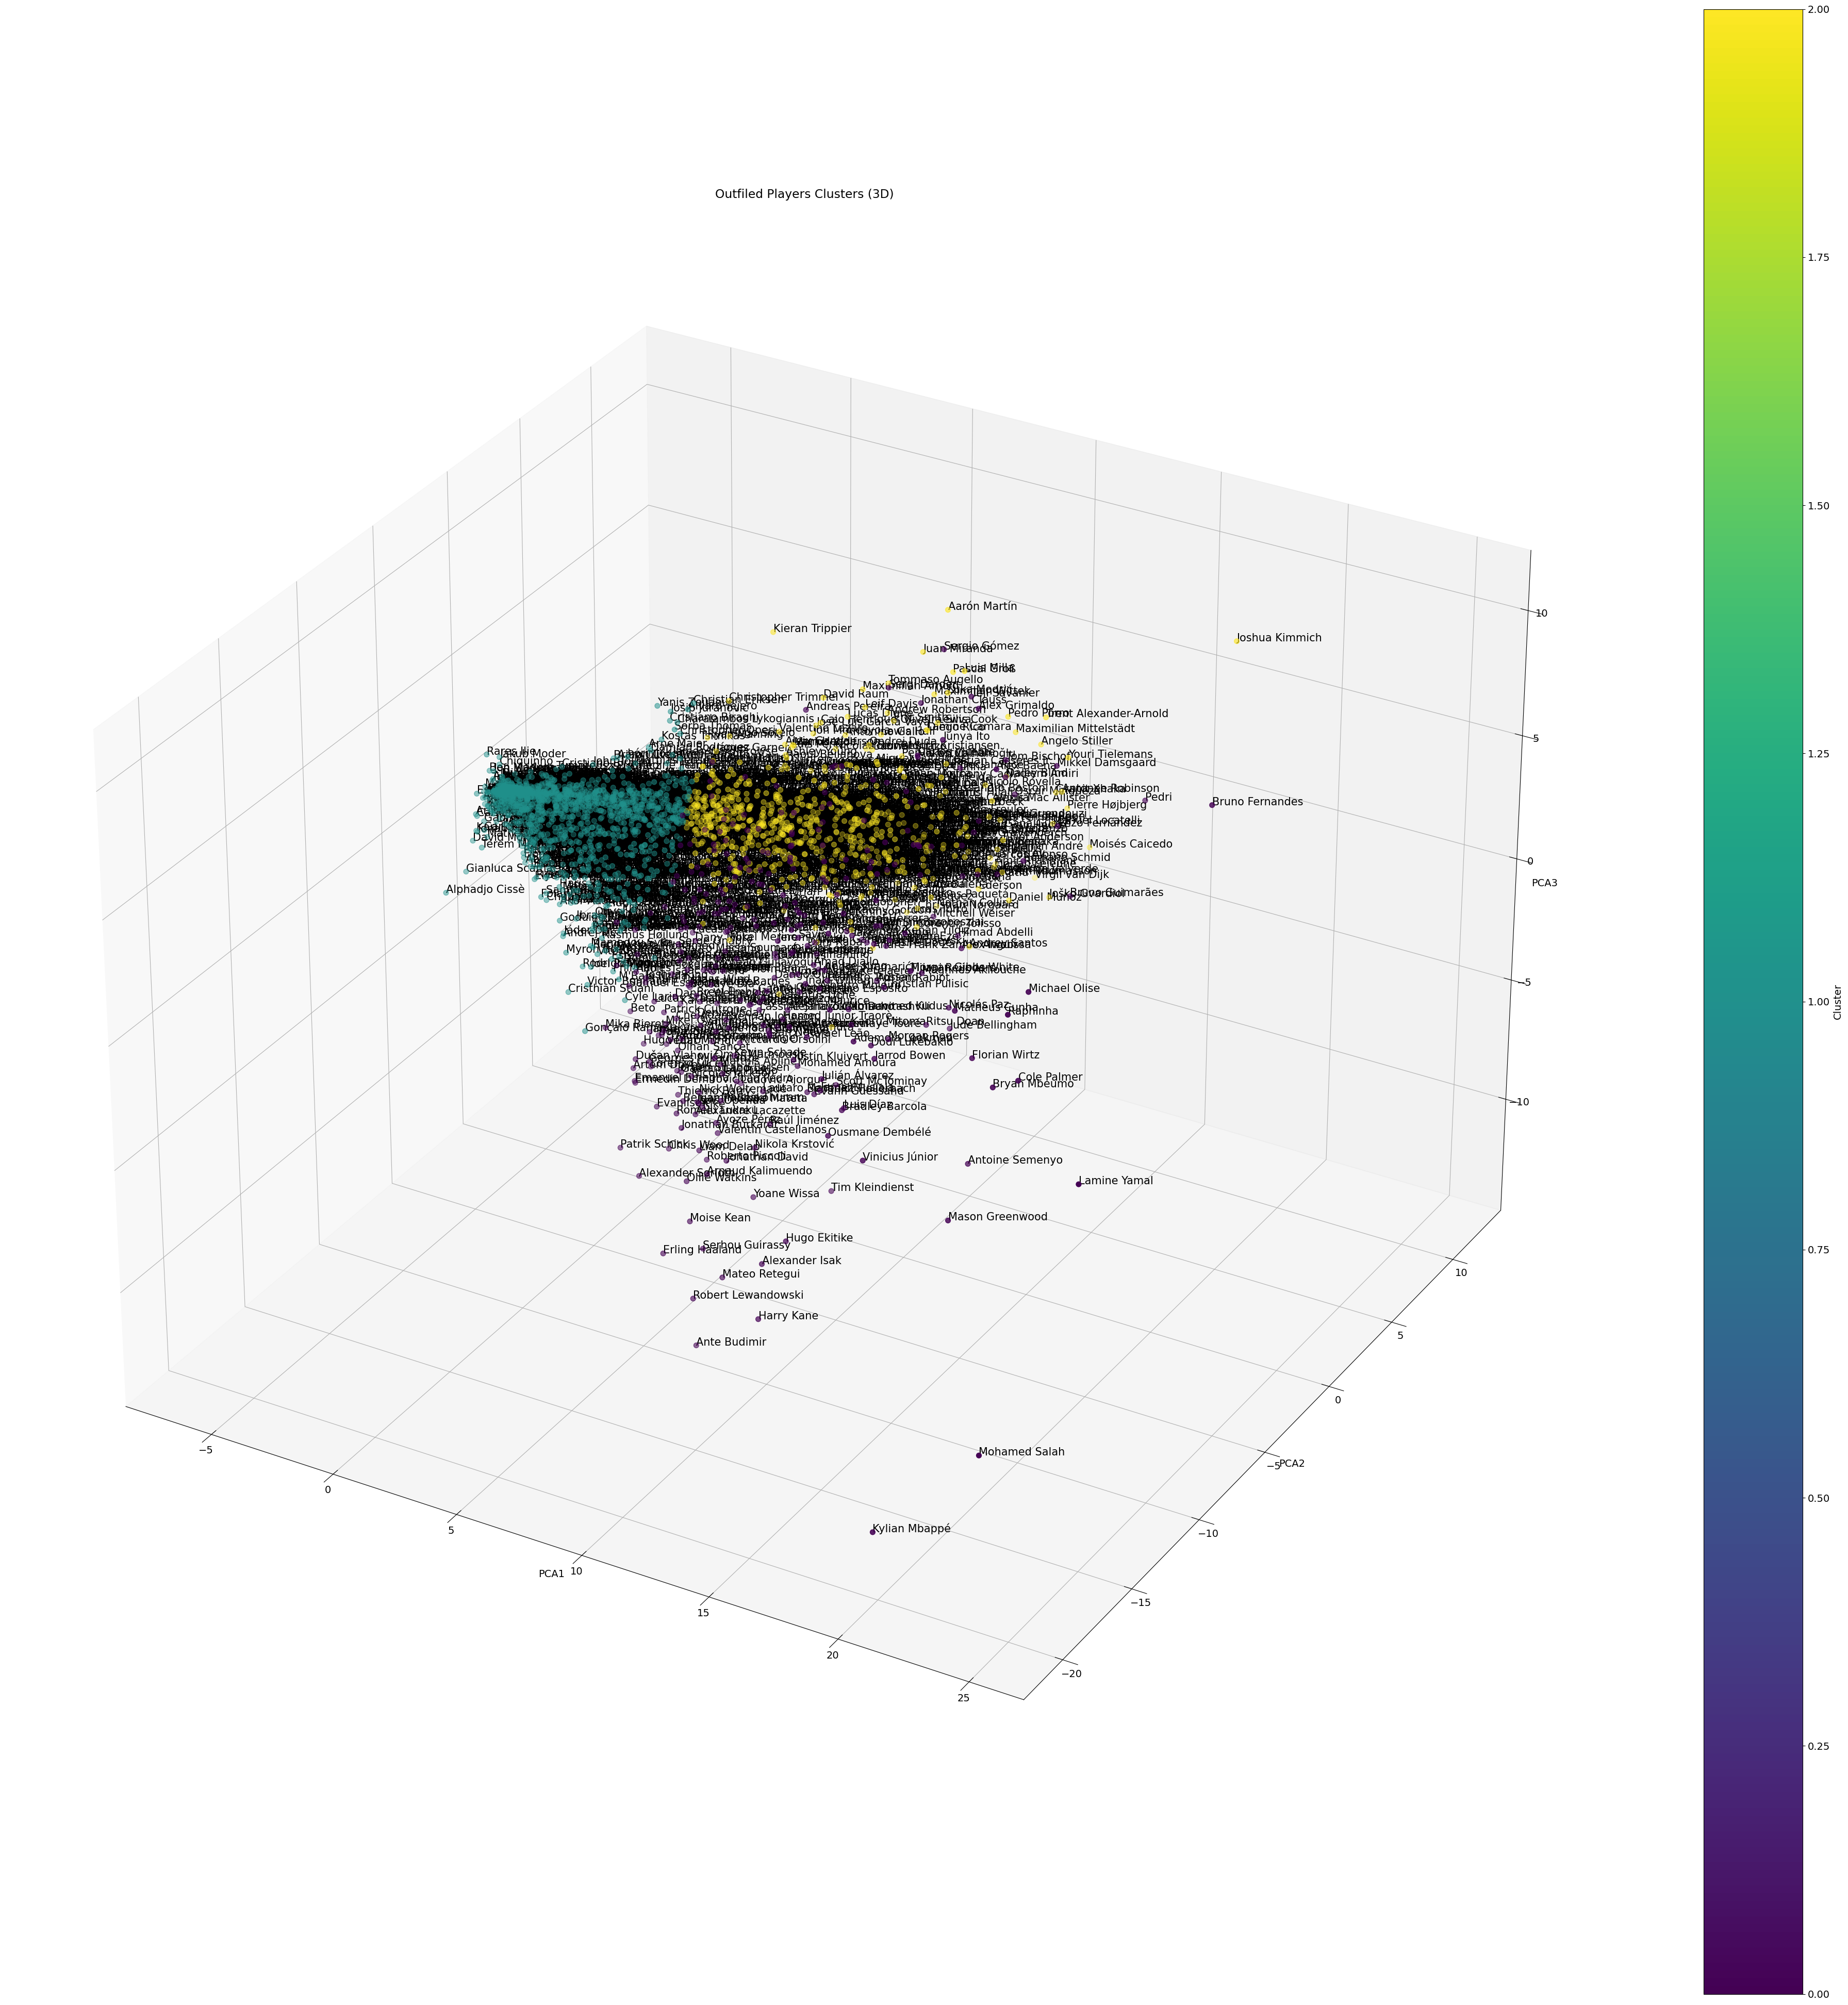

In [ ]:


fig = plt.figure(figsize=(50, 50))
ax = fig.add_subplot(111, projection='3d')

# Reset index of goalkeepers_df to ensure alignment with scaled_goalkeepers_df
outfield_df_reset = outfield_df.reset_index(drop=True)

# Scatter plot
sc = ax.scatter3D(
    scaled_outfield_df['pca1'],
    scaled_outfield_df['pca2'],
    scaled_outfield_df['pca3'],
    c=outfield_df_reset['cluster'],  # Use the reset dataframe for cluster
    cmap='viridis',
    s=50
)

# Annotate player names
for i, player in enumerate(outfield_df_reset['Player']):

    ax.text(
        scaled_outfield_df['pca1'][i],
        scaled_outfield_df['pca2'][i],
        scaled_outfield_df['pca3'][i],
        player,
        size=15,  # font size
        zorder=1,
        color='black',

    )

# Axis labels
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Title and colorbar
plt.title('Outfiled Players Clusters (3D)')
plt.colorbar(sc, label='Cluster')

plt.show()

In [ ]:
def calc_pca(X_scaled):
  pca_temp=PCA()
  pca_temp.fit(X_scaled)
  cumsum = np.cumsum(pca_temp.explained_variance_ratio_)
  n_components = np.argmax(cumsum >= 0.95) + 1
  print(f"PCA components for 95% variance: {n_components}")
  pca = PCA(n_components=n_components)
  X_pca = pca.fit_transform(X_scaled)
  joblib.dump({'outfield_pca':X_pca},'outfield_pca.pkl')
  return X_pca

def calc_wcss(X_pca):
  WCSS = []
  K = range(1, 20)

  for i in K:
      kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
      kmeans.fit(X_pca)
      WCSS.append(kmeans.inertia_)

  plt.figure(figsize=(8,5))
  plt.plot(K, WCSS, marker='o')
  plt.xticks(K)
  plt.xlabel("Number of clusters (k)")
  plt.ylabel("WCSS")
  plt.title("Elbow Method (Goalkeepers)")
  plt.show()

def cluster_with_pca_features(X_pca,n):
  kmeans_pca=KMeans(n_clusters=n,random_state=42,init='k-means++')
  y_kmeans_pca=kmeans_pca.fit_predict(X_pca)
  return y_kmeans_pca

PCA components for 95% variance: 26


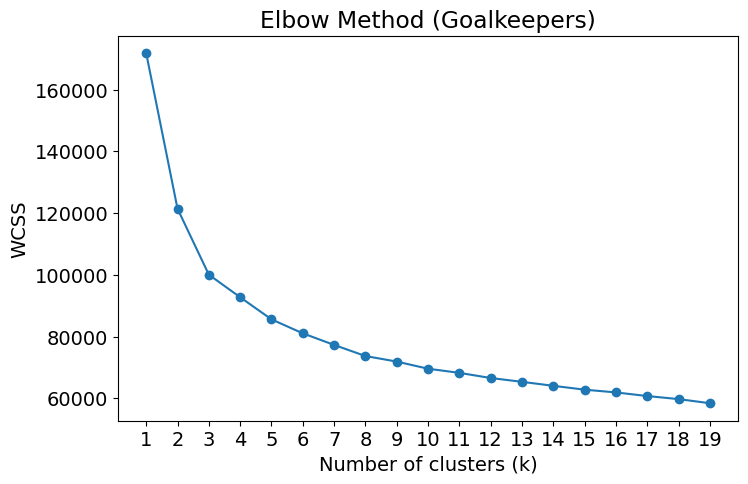

In [ ]:
calc_wcss(calc_pca(scaled_X_outfield))


##### Stats after PCA

In [ ]:

copy_outfield_df['cluster'] = cluster_with_pca_features(calc_pca(scaled_X_outfield),3)
copy_outfield_df.head()

PCA components for 95% variance: 26


Player   Nation    Pos        Squad                Comp   Age  \
0         Max Aarons  eng ENG     DF  Bournemouth  eng Premier League  24.0   
1         Max Aarons  eng ENG  DF,MF     Valencia          es La Liga  24.0   
2     Rodrigo Abajas   es ESP     DF     Valencia          es La Liga  21.0   
3     James Abankwah   ie IRL  DF,MF      Udinese          it Serie A  20.0   
4  Keyliane Abdallah   fr FRA     FW    Marseille          fr Ligue 1  18.0   

   Gls  Ast  G-PK  PK  PKatt   xG  npxG  xAG  G-xG  np:G-xG  Sh  SoT  Sh/90  \
0    0    0     0   0      0  0.0   0.0  0.0   0.0      0.0   0    0   0.00   
1    0    0     0   0      0  0.0   0.0  0.0   0.0      0.0   0    0   0.00   
2    0    0     0   0      0  0.1   0.1  0.0  -0.1     -0.1   1    0   1.38   
3    0    0     0   0      0  0.1   0.1  0.0  -0.1     -0.1   1    0   1.02   
4    0    0     0   0      0  0.0   0.0  0.0   0.0      0.0   0    0   0.00   

   SoT/90  FK  Cmp  Att   Cmp%  TotDist  PrgDist   xA  A-xAG  KP  1/3  PPA  \
0     0.0   0   50   63   79.4      887      361  0.0    0.0   0    8    0   
1     0.0   0   47   66   71.2      705      190  0.0    0.0   1    2    0   
2     0.0   0   17   29   58.6      268      110  0.0    0.0   0    0    0   
3     0.0   0   36   46   78.3      614      206  0.0    0.0   0    2    0   
4     0.0   0    2    2  100.0       41        0  0.0    0.0   0    0    0   

   CrsPA  Live  TB  Sw  Crs  In  Out  Str  PrgC  PrgP  PrgR  SCA90  PassLive  \
0      0    51   0   0    2   0    0    0     1     8     3   2.09         2   
1      0    54   0   0    5   0    0    0     0     6    10   0.75         1   
2      0    21   0   0    1   0    0    0     3     2     3   0.00         0   
3      0    45   0   0    0   0    0    0     3     4     1   1.02         1   
4      0     2   0   0    0   0    0    0     1     0     0   0.00         0   

   PassDead  TO  Sh_stats_gca  Fld  Def  GCA90  Tkl  TklW  Def 3rd  Mid 3rd  \
0         0   0             0    0    0    0.0    2     2        1        1   
1         0   0             0    0    0    0.0    4     4        2        2   
2         0   0             0    0    0    0.0    3     2        2        1   
3         0   0             0    0    0    0.0    4     2        4        0   
4         0   0             0    0    0    0.0    1     1        1        0   

   Att 3rd  Lost  Int  Blocks_stats_defense  Clr  Err  Touches  Def Pen  \
0        0     0    1                     3    0    0       73        2   
1        0     1    0                     1    3    0       85        1   
2        0     0    1                     1    0    0       36        1   
3        0     1    1                     2    3    0       65        8   
4        0     0    0                     0    0    0        4        0   

   Att Pen  Succ  Tkld  Carries  CPA  Mis  Dis  Rec  Won  Fls  PKwon  PKcon  \
0        0     0     1       41    0    1    0   40    0    0      0      0   
1        0     1     2       46    0    3    1   49    2    0      0      0   
2        1     1     0       13    1    0    2   16    0    2      0      0   
3        2     0     0       29    1    1    3   34    2    4      0      0   
4        0     0     0        1    0    1    0    3    0    0      0      0   

   Recov  cluster  
0      7        1  
1      7        1  
2      2        1  
3      7        1  
4      0        1

In [ ]:
pca_outfield_cluster_0=(copy_outfield_df[copy_outfield_df['cluster']==0]).sort_values(by=new_cols,ascending=False)
pca_outfield_cluster_1=(copy_outfield_df[copy_outfield_df['cluster']==1]).sort_values(by=new_cols,ascending=False)
pca_outfield_cluster_2=(copy_outfield_df[copy_outfield_df['cluster']==2]).sort_values(by=new_cols,ascending=False)

In [ ]:
pca_aggregated_outfield_df=copy_outfield_df.groupby('cluster')[new_cols].mean()
pca_aggregated_outfield_df

Gls       Ast      G-PK        PK     PKatt        xG      npxG  \
cluster                                                                         
0        7.760807  4.475504  6.922190  0.838617  1.054755  7.075216  6.248415   
1        0.740243  0.476647  0.700576  0.039667  0.056302  0.889507  0.844466   
2        1.348506  1.576102  1.273115  0.075391  0.085349  1.448222  1.377667   

              xAG      G-xG   np:G-xG         Sh        SoT     Sh/90  \
cluster                                                                 
0        4.289625  0.685591  0.673775  53.357349  20.005764  2.247781   
1        0.537876 -0.149264 -0.143890   7.947537   2.607806  1.440550   
2        1.594879 -0.098293 -0.103129  17.287340   4.793741  0.728506   

           SoT/90        FK          Cmp          Att       Cmp%  \
cluster                                                            
0        0.846369  1.685879   641.536023   847.507205  74.241787   
1        0.428868  0.195138   192.191299   240.554702  76.711324   
2        0.204922  0.517781  1086.122333  1291.419630  83.199004   

              TotDist      PrgDist        xA     A-xAG         KP        1/3  \
cluster                                                                        
0         9956.942363  2665.461095  3.915274  0.185879  36.204611  51.570605   
1         3179.705054   959.594370  0.499296 -0.061228   5.196417  14.404351   
2        18929.893314  6231.244666  1.723898 -0.018777  16.733997  90.466572   

               PPA     CrsPA         Live        TB        Sw        Crs  \
cluster                                                                    
0        29.622478  6.685879   772.377522  6.443804  5.446686  65.570605   
1         4.044786  1.210493   219.698656  0.680742  1.216891   9.957774   
2        15.149360  4.591750  1180.088193  2.568990  7.254623  33.506401   

                In       Out       Str       PrgC       PrgP        PrgR  \
cluster                                                                    
0        11.170029  7.230548  0.187320  66.559078  86.337176  161.726225   
1         1.119642  0.787588  0.021753   9.669866  18.516955   23.603327   
2         3.301565  2.524893  0.075391  29.726885  99.338549   49.344239   

            SCA90   PassLive  PassDead        TO  Sh_stats_gca       Fld  \
cluster                                                                    
0        3.374438  54.752161  7.501441  6.389049      5.884726  4.452450   
1        2.195573   8.912988  0.906590  0.732566      0.911708  0.658349   
2        1.758649  32.731152  3.502134  1.109531      2.000000  1.270270   

              Def     GCA90        Tkl       TklW    Def 3rd    Mid 3rd  \
cluster                                                                   
0        1.051873  0.422594  29.008646  17.374640  10.112392  12.034582   
1        0.214971  0.185912   9.666027   5.783109   4.405630   3.850288   
2        0.886202  0.177112  46.112376  28.069701  23.638691  17.722617   

          Att 3rd       Lost        Int  Blocks_stats_defense        Clr  \
cluster                                                                    
0        6.861671  16.757925  10.233429             20.095101  19.893372   
1        1.410109   4.491363   4.463212              6.334613  13.307102   
2        4.751067  17.830725  25.469417             29.240398  76.834993   

              Err      Touches     Def Pen     Att Pen       Succ       Tkld  \
cluster                                                                        
0        0.809798  1123.700288   23.559078  100.270893  30.948127  35.374640   
1        0.295585   308.589251   18.577735   14.049264   4.358925   5.245681   
2        1.658606  1547.011380  118.322902   28.173542  11.231863  10.295875   

            Carries        CPA        Mis        Dis         Rec        Won  \
cluster                                                                       
0        668.599424  26.331412  55.034582

##### Save Model

In [ ]:
cluster_obj={
    'scaler':standard_scaler,
    'pca':pca,
    'kmeans':kmeans,
    'cluster_labels':[0,1,2]
}
joblib.dump(cluster_obj,'outfieldcluster_obj.pkl')


['outfieldcluster_obj.pkl']

#### KNN

##### Model Training

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
outfield_nn=NearestNeighbors(n_neighbors=5,metric='cosine',algorithm='auto')


In [ ]:
X_pca=calc_pca(scaled_X_outfield)
outfield_nn.fit(X_pca)

PCA components for 95% variance: 26


NearestNeighbors(metric='cosine')

##### Get Similar Players

In [ ]:
def calc_similar_players(name,X_pca):
  if name in outfield_df['Player'].values:
    player_index = outfield_df.index.get_loc(outfield_df[outfield_df['Player'] == name].index[0])
    print(player_index)
    player_pca=X_pca[player_index].reshape(1,-1)
    distances, indices = outfield_nn.kneighbors(player_pca, n_neighbors=4)
    distances = list(distances[0][1:4])
    distances.append(0)#so that the players own distance is made 0
    indices = list(indices[0][1:4])
    print(indices)
    indices.append(player_index)
    print(indices)
    similar_players=outfield_df.iloc[indices]
    similar_players['distance']=distances
    return similar_players
  else:
    print("Player not found")


In [ ]:
calc_similar_players(input("Enter a players name:"),X_pca)

Enter a players name:x
Player not found


##### Save Model

In [ ]:
model_obj={
    'standard_scaler':standard_scaler,
    'pca':pca,
    'knn':outfield_nn
}
joblib.dump(model_obj,'outfield_nn_model.pkl')


['outfield_nn_model.pkl']

In [ ]:
outfield=outfield_df['Player'].tolist()
joblib.dump({'outfield':outfield},'outfield.pkl')

['outfield.pkl']

In [ ]:
outfield_df.iloc[1691]

Player       Aihen Muñoz
Nation            es ESP
Pos                   DF
Squad      Real Sociedad
Comp          es La Liga
               ...      
Fls                   15
PKwon                  0
PKcon                  1
Recov                 43
cluster                1
Name: 1821, Length: 76, dtype: object

In [ ]:
barca_outfield_players=outfield_df[outfield_df['Squad']=='Barcelona']

In [ ]:
barca_outfield_players

Player  Nation    Pos      Squad        Comp   Age  Gls  \
144         Ronald Araújo  uy URU     DF  Barcelona  es La Liga  25.0    1   
215       Alejandro Balde  es ESP     DF  Barcelona  es La Liga  20.0    0   
314           Marc Bernal  es ESP     MF  Barcelona  es La Liga  17.0    0   
496           Marc Casado  es ESP     MF  Barcelona  es La Liga  20.0    1   
554   Andreas Christensen  dk DEN     DF  Barcelona  es La Liga  28.0    0   
633           Pau Cubarsí  es ESP     DF  Barcelona  es La Liga  17.0    0   
764       Sergi Dominguez  es ESP     DF  Barcelona  es La Liga  19.0    0   
877             Ansu Fati  es ESP     FW  Barcelona  es La Liga  21.0    0   
924           Héctor Fort  es ESP     DF  Barcelona  es La Liga  17.0    0   
969           Eric García  es ESP  DF,MF  Barcelona  es La Liga  23.0    2   
981                  Gavi  es ESP  MF,FW  Barcelona  es La Liga  19.0    1   
1274      Frenkie de Jong  nl NED     MF  Barcelona  es La Liga  27.0    2   
1400         Jules Koundé  fr FRA     DF  Barcelona  es La Liga  25.0    2   
1483   Robert Lewandowski  pl POL     FW  Barcelona  es La Liga  35.0   27   
1519         Fermin López  es ESP  MF,FW  Barcelona  es La Liga  21.0    6   
1639        Gerard Martín  es ESP     DF  Barcelona  es La Liga  22.0    1   
1647       Iñigo Martínez  es ESP     DF  Barcelona  es La Liga  33.0    0   
1964            Dani Olmo  es ESP  MF,FW  Barcelona  es La Liga  26.0   10   
2060                Pedri  es ESP     MF  Barcelona  es La Liga  21.0    4   
2177             Raphinha  br BRA  FW,MF  Barcelona  es La Liga  27.0   18   
2235     Daniel Rodriguez  es ESP     FW  Barcelona  es La Liga  18.0    0   
2610          Pablo Torre  es ESP  MF,FW  Barcelona  es La Liga  21.0    3   
2612        Ferrán Torres  es ESP  FW,MF  Barcelona  es La Liga  24.0   10   
2704           Pau Victor  es ESP     FW  Barcelona  es La Liga  22.0    2   
2792         Lamine Yamal  es ESP     FW  Barcelona  es La Liga  17.0    9   

      Ast  G-PK  PK  PKatt    xG  npxG   xAG  G-xG  np:G-xG   Sh  SoT  Sh/90  \
144     1     1   0      0   1.0   1.0   0.4   0.0      0.0    4    2   0.48   
215     4     0   0      0   0.5   0.5   3.4  -0.5     -0.5   12    3   0.47   
314     0     0   0      0   0.1   0.1   0.0  -0.1     -0.1    2    1   0.74   
496     3     1   0      0   1.1   1.1   1.4  -0.1     -0.1   14    1   0.78   
554     0     0   0      0   0.0   0.0   0.0   0.0      0.0    1    0   0.35   
633     3     0   0      0   0.8   0.8   1.6  -0.8     -0.8    8    0   0.28   
764     0     0   0      0   0.0   0.0   0.0   0.0      0.0    0    0   0.00   
877     0     0   0      0   1.0   1.0   0.2  -1.0     -1.0   12    5   4.64   
924     0     0   0      0   0.2   0.2   0.9  -0.2     -0.2    6    0   0.92   
969     3     2   0      0   2.3   2.3   0.8  -0.3     -0.3   14    8   0.80   
981     1     1   0      0   0.9   0.9   1.6   0.1      0.1   11    1   0.91   
1274    2     2   0      0   0.7   0.7   2.0   1.3      1.3    5    3   0.39   
1400    3     2   0      0   1.8   1.8   3.9   0.2      0.2   18    6   0.62   
1483    2    24   3      4  27.1  24.0   2.3  -0.1      0.0  111   45   3.75   
1519    5     6   0      0   5.6   5.6   3.9   0.4      0.4   41   15   2.95   
1639    3     1   0      0   0.5   0.5   1.1   0.5      0.5    7    2   0.61   
1647    4     0   0      0   0.5   0.5   2.6  -0.5     -0.5   13    2   0.47   
1964    3     8   2      2   6.5   4.9   3.0   3.5      3.1   40   15   2.97   
2060    5     4   0      0   2.2   2.2   7.4   1.8      1.8   25   11   0.78   
2177    9    16   2      2  19.2  17.6  12.7  -1.2     -1.6  112   40   3.55   
2235    0     0   0      0   0.0   0.0   0.0   0.0      0.0    2    0   4.86   
2610    1     3   0      0   0.4   0.4   0.8   2.6      2.6    6    4   1.74   
2612    6    10   0      0   8.0   8.0   3.1   2.0      2.0   48   22   3.91   
2704    1     2   0      0   3.0   3.0   0.9  -1.0     -1.0   14    8 

## Sample Charts

In [ ]:
outfield_df[outfield_df['Player']=='Lamine Yamal']['Gls'].item()

9

In [ ]:
import plotly.graph_objects as go

def radar(player1, player2, df=outfield_df):
    categories = ['Gls','Ast','xG','xAG','Sh/90']

    # Get integer positions
    p1_idx = df.index.get_loc(df[df['Player'] == player1].index[0])
    p2_idx = df.index.get_loc(df[df['Player'] == player2].index[0])

    # Extract stats
    player1_stats = df.iloc[p1_idx][categories].tolist()
    player2_stats = df.iloc[p2_idx][categories].tolist()

    # Create radar chart
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=player1_stats,
        theta=categories,
        fill='toself',
        name=player1
    ))

    fig.add_trace(go.Scatterpolar(
        r=player2_stats,
        theta=categories,
        fill='toself',
        name=player2
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, max(max(player1_stats), max(player2_stats)) * 1.1]  # automatic range
            )
        ),
        showlegend=True
    )

    fig.show()


In [ ]:
radar('Lamine Yamal','Vinicius Júnior')

In [ ]:
goalkeeper_names=joblib.load('/content/goalkeepers.pkl')['goalkeepers']

In [ ]:
goalkeeper_names

['Adrián',
 'Julen Agirrezabala',
 'Alisson',
 'Alphonse Areola',
 'Kepa Arrizabalaga',
 'Noah Atubolu',
 'Emil Audero',
 'Brandon Austin',
 'Augusto Batalla',
 'Oliver Baumann',
 'Altay Bayındır',
 'Daniel Bentley',
 'Dimitry Bertaud',
 'Marco Bizot',
 'Jean Butez',
 'Marcin Bułka',
 'Elia Caprile',
 'Elia Caprile',
 'Dani Cárdenas',
 'Tiago Cardoso',
 'Patrik Carlgren',
 'Marco Carnesecchi',
 'Lucas Chevalier',
 'Leandro Chichizola',
 'Jasper Cillessen',
 'Diego Conde',
 'Grégoire Coudert',
 'Thibaut Courtois',
 'Finn Dahmen',
 'Thomas Dähne',
 'Théo De Percin',
 'Rémy Descamps',
 'Arthur Desmas',
 'Michele Di Gregorio',
 'Stole Dimitrievski',
 'Yehvann Diouf',
 'Marko Dmitrović',
 'Gianluigi Donnarumma',
 'Patrick Drewes',
 'Martin Dúbravka',
 'Ederson',
 'Łukasz Fabiański',
 'Wladimiro Falcone',
 'Frank Feller',
 'Aitor Fernández',
 'Álvaro Fernández',
 'André Ferreira',
 'Mark Flekken',
 'Yahia Fofana',
 'Fraser Forster',
 'Fran',
 'Joan García',
 'Paulo Gazzaniga',
 'David de Gea

In [ ]:
a=[1,2,3]
b=[4,5,6]
a+b

[1, 2, 3, 4, 5, 6]